Author: Abhishek Shrivastava. Date: 01/09/2021

# Dependencies
1. openCV - my version 4.4.0.46 
2. PIMS - my version 0.5
3. Scikitimage - my version 0.16.2
4. trackpy - my version 0.4.2

The usual:
1. Numpy - my version 1.16.4
2. Pandas - my version 1.0.5
3. Matplotlib - my version 3.2.2
4. OS

# 1. Extract images from video
Dark cells on light background

In [1]:
# This takes some time. Took about a minute on my computer with a 1500 frame video. 
# Each frame is saved as a tiff file.
import cv2
vidcap = cv2.VideoCapture('fig2_swarmfluid.avi')
def getFrame(sec):
    #vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    vidcap.set(cv2.CAP_PROP_FPS, 15.54)
    hasFrames,image = vidcap.read()
    if hasFrames:
        cv2.imwrite("image"+str(count)+".tiff", image)     # save frame as tiff file
    return hasFrames
sec = 0
frameRate = 1 #//it will capture image in each 1/15.54 second
count=1
success = getFrame(sec)
while success:
    count = count + 1
    sec = sec + frameRate
    sec = round(sec, 2)
    success = getFrame(sec)

# 2. Measure centroid of the bacterial cell from one image

# 2.1 Opening the 1st frame

In [2]:
import numpy as np
import pandas as pd
import pims
import matplotlib.pyplot as plt

In [3]:
images = pims.open('./*.tiff') #reading all tiff files

In [4]:
images

<Frames>
Source: /home/nkr/Desktop/10_27_21/*.tiff
Length: 500 frames
Frame Shape: (512, 512, 3)
Pixel Datatype: uint8

In [5]:
print(images[0])  # the first frame

[[[  0  13   0]
  [  0   6   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0  13   0]
  [  0  13   0]
  [  0   6   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0  13   0]
  [  0  13   0]
  [  0  13   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[  0   6   0]
  [  0   6   0]
  [  0   6   0]
  ...
  [  0  40   0]
  [  0  87   0]
  [  0 134   0]]

 [[  0   0   0]
  [  0   6   0]
  [  0   6   0]
  ...
  [  0  26   0]
  [  0  67   0]
  [  0 107   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0  20   0]
  [  0  40   0]
  [  0  53   0]]]


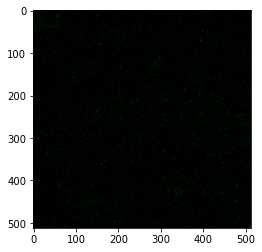

In [6]:
plt.imshow(images[0]) # the first frame
# Can also check other frames . eg. plt.imshow(images[1400])

# 2.2 Determining the correct threshold

In [7]:
from skimage.color import rgb2gray
gs = rgb2gray(images[0])
gs2=gs

In [8]:
gs2 # the number below will help develop an intution of the threshold

array([[0.03647137, 0.01683294, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03647137, 0.03647137, 0.01683294, ..., 0.        , 0.        ,
        0.        ],
       [0.03647137, 0.03647137, 0.03647137, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.01683294, 0.01683294, 0.01683294, ..., 0.11221961, 0.24407765,
        0.37593569],
       [0.        , 0.01683294, 0.01683294, ..., 0.07294275, 0.18796784,
        0.30018745],
       [0.        , 0.        , 0.        , ..., 0.0561098 , 0.11221961,
        0.14869098]])

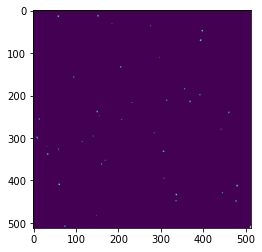

In [9]:
thresh = .1 # Adjust the threshold here
binary = gs2 > thresh
plt.imshow(binary)

# Note: Proceed only if threshold above is good

# 2.3 Measuring the centroid of one frame

In [10]:
from skimage import measure
labels = measure.label(binary)
props = measure.regionprops(labels)
lr =[]
aa2=[]
for prop in props:
    print('Label: {} >> Area: {}'.format(prop.label, prop.area))
    aa = [prop.label,prop.area,prop.centroid,prop.major_axis_length,prop.minor_axis_length]
    aa2 += aa
    lr.append(aa)

Label: 1 >> Area: 7
Label: 2 >> Area: 9
Label: 3 >> Area: 1
Label: 4 >> Area: 2
Label: 5 >> Area: 8
Label: 6 >> Area: 10
Label: 7 >> Area: 1
Label: 8 >> Area: 6
Label: 9 >> Area: 4
Label: 10 >> Area: 2
Label: 11 >> Area: 4
Label: 12 >> Area: 4
Label: 13 >> Area: 4
Label: 14 >> Area: 7
Label: 15 >> Area: 2
Label: 16 >> Area: 7
Label: 17 >> Area: 6
Label: 18 >> Area: 1
Label: 19 >> Area: 4
Label: 20 >> Area: 2
Label: 21 >> Area: 2
Label: 22 >> Area: 2
Label: 23 >> Area: 2
Label: 24 >> Area: 7
Label: 25 >> Area: 2
Label: 26 >> Area: 2
Label: 27 >> Area: 1
Label: 28 >> Area: 3
Label: 29 >> Area: 7
Label: 30 >> Area: 8
Label: 31 >> Area: 2
Label: 32 >> Area: 4
Label: 33 >> Area: 2
Label: 34 >> Area: 9
Label: 35 >> Area: 9
Label: 36 >> Area: 1
Label: 37 >> Area: 4
Label: 38 >> Area: 8
Label: 39 >> Area: 4
Label: 40 >> Area: 6
Label: 41 >> Area: 1
Label: 42 >> Area: 5
Label: 43 >> Area: 11


Decide the area threshold based on the numbers above

In [11]:
from pandas import DataFrame
Outprops = DataFrame (lr,columns=['Cell#_arbit','Area','Centroid','Majoraxis','Minoraxis'])
Outprops

,Cell#_arbit,Area,Centroid,Majoraxis,Minoraxis
0,1,7,"(13.0, 152.28571428571428)",3.023716,2.799417
1,2,9,"(14.0, 59.0)",3.265986,3.265986
2,3,1,"(31.0, 185.0)",0.000000,0.000000
3,4,2,"(36.5, 276.0)",2.000000,0.000000
4,5,8,"(48.125, 397.125)",3.464102,2.738613
5,6,10,"(70.3, 393.3)",4.000000,3.149603
6,7,1,"(111.0, 297.0)",0.000000,0.000000
7,8,6,"(133.0, 205.5)",3.265986,2.000000
8,9,4,"(157.0, 95.25)",2.828427,1.732051
9,10,2,"(163.5, 0.0)",2.000000,0.000000


In [13]:
# Apply area filer here
at = 2
df3 = Outprops[~(Outprops['Area'] <= at)]
df3

,Cell#_arbit,Area,Centroid,Majoraxis,Minoraxis
0,1,7,"(13.0, 152.28571428571428)",3.023716,2.799417
1,2,9,"(14.0, 59.0)",3.265986,3.265986
4,5,8,"(48.125, 397.125)",3.464102,2.738613
5,6,10,"(70.3, 393.3)",4.000000,3.149603
7,8,6,"(133.0, 205.5)",3.265986,2.000000
8,9,4,"(157.0, 95.25)",2.828427,1.732051
10,11,4,"(184.5, 355.5)",2.000000,2.000000
11,12,4,"(198.5, 391.5)",2.000000,2.000000
12,13,4,"(211.5, 313.5)",2.000000,2.000000
13,14,7,"(214.14285714285714, 368.2857142857143)",3.582070,2.471346


### Is the result of the cell below similar to the number of cells that you can manually count in the image below? If yes, all is good. You can proceed with the for loop.

Number of cells =  26


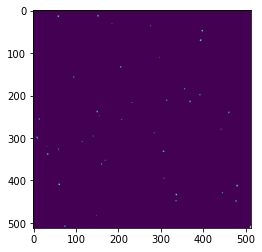

In [14]:
ncells = df3.shape[0]
print('Number of cells = ', ncells)
plt.imshow(binary)

# 3. Use for loop and measure centroid from all images (frames)

In [15]:
# This loop will take some time. For 1500 frames, ~10 cell/frame, it took 1.5 minutes
frame = 0
Outprops2 = pd.DataFrame([])

for image in images:
    gs1 = rgb2gray(image)
    gs2_1=gs1
    binary1 = gs2_1 > thresh
    labels = measure.label(binary1)
    props = measure.regionprops(labels)
    
    lr1 =[]
    frame = frame + 1 
    for prop in props:
        #print('Label: {} >> Area: {}'.format(prop.label, prop.area))
        centroid = [prop.centroid]
        cpx = centroid[0][0]
        
        cpy = centroid[0][1]
        aa1 = [prop.area,cpx,cpy,prop.major_axis_length,prop.minor_axis_length,frame]
        lr1.append(aa1)
        
    
    Outprops1 = DataFrame(lr1,columns=['mass','x','y','Majoraxis','Minoraxis','frame'])    
    # Apply area filer here
    
    Outprops2 = Outprops2.append(Outprops1)
    df3 = Outprops2[~(Outprops2['mass'] <= at)]  # this is the area filter to remove noise
    

# 4. Plot the Centroid for all frames

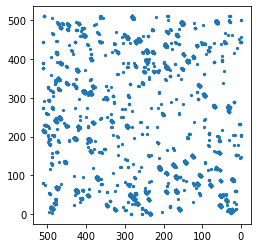

In [16]:
plt.scatter(df3['x'],df3['y'],s=5)
plt.gca().invert_xaxis()
plt.gca().set_aspect('equal', adjustable='box')

# 4.1 Time as colormap

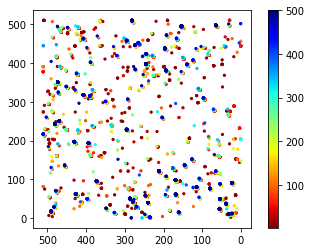

In [17]:
plt.scatter(df3['x'],df3['y'], s=5, c=df3['frame'], cmap="jet_r")
plt.gca().invert_xaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()

Exercise: Use time rather than nFrames for colormap. 
What is the frame rate?

# 5. Extra: Delete all tiff images (if needed)

In [18]:
import os
cwd = os.getcwd()
import os

dir_name = cwd
test = os.listdir(dir_name)

for item in test:
    if item.endswith(".tiff"):
        os.remove(os.path.join(dir_name, item))

# 6. Implementing Trackpy for joining the tracks and filtering

In [19]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 5))

mpl.rc('image', cmap='gray')

from pandas import DataFrame, Series  # for convenience

import trackpy as tp

# 6.1 Link features into particle trajectories
We have the locations of the particles in each frame. Next we'll track particles from frame to frame, giving each one a number for identification.
First, we must must specify a maximum displacement, the farthest a particle can travel between frames. We should choose the smallest reasonable value because a large value slows computation time considerably. In this case, 20 pixels is reasonable.
Second, we allow for the possibility that a particle might be missed for a few frames and then seen again. (Perhaps its "mass" slipped below our cutoff due to noise in the video.) Memory keeps track of disappeared particles and maintains their ID for up to some number of frames after their last appearance. Here we use 4 frames.

In [20]:
# tp.quiet()  # Turn off progress reports for best performance
t = tp.link(df3, 5, memory=50)

Frame 500: 21 trajectories present.


The result is the features DataFrame with an additional column, particle, identifying each feature with a label. We denote this new DataFrame t.

In [21]:
#t

# 6.2  Filter spurious trajectories
We have more filtering to do. Ephemeral trajectories — seen only for a few frames — are usually spurious and never useful. The convenience function filter_stubs keeps only trajectories that last for a given number of frames.

In [22]:
t1 = tp.filter_stubs(t, 50)
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

Before: 609
After: 55


In [23]:
#t1

We can also filter trajectories by their particles' appearance. At this stage, with trajectories linked, we can look at a feature's "average appearance" throughout its trajectory, giving a more accurate picture.

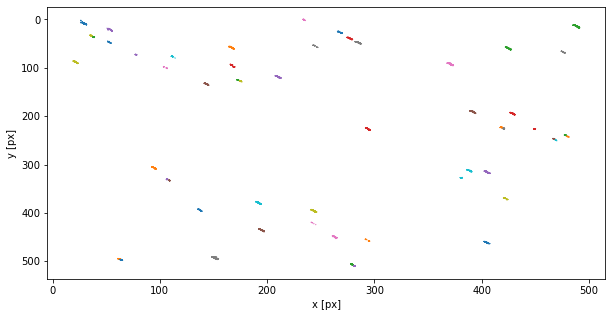

In [24]:
plt.figure()
tp.plot_traj(t1);

# 6.3 Remove overall drift
Compute the overall drifting motion, which we will subtract away, adopting the reference frame of the particles' average position.

In [25]:
d = tp.compute_drift(t1)

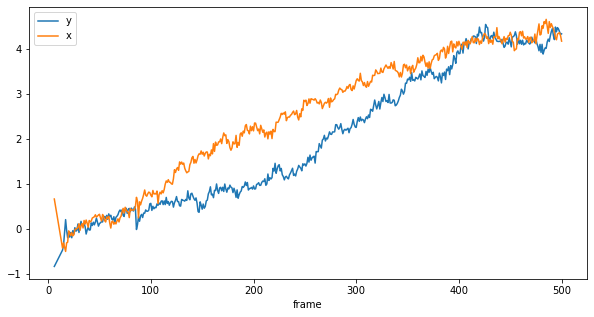

In [26]:
d.plot()
plt.show()

In [27]:
tm = tp.subtract_drift(t1.copy(), d)

With the overall drifting motion subtracted out, we plot the trajectories again.

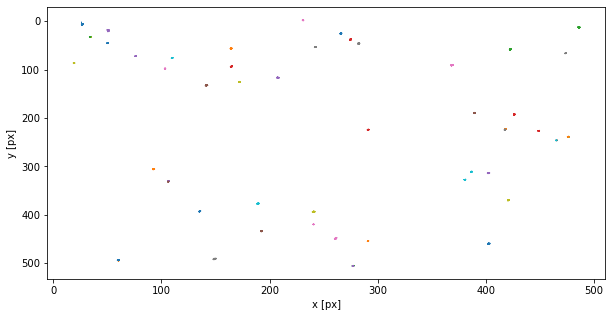

In [28]:
ax = tp.plot_traj(tm)
plt.show()

In [29]:
#print(tm)

In [30]:
tm1=pd.DataFrame(data=tm, columns=['x', 'y', 'frame','particle'])

In [31]:
tm1.columns = ['x', 'y','frameN','particle']

In [32]:
tm2=tm1.sort_values(by=['particle','frameN'], ascending=True)

In [33]:
#d.set_option('display.max_rows', None)
print(tm2)


                x           y  frameN  particle
frame                                          
2       26.000000    2.000000       2        33
5       26.000000    3.166667       5        33
6       26.000000    3.166667       6        33
25      26.270518    6.400890      25        33
32      26.927811    5.830323      32        33
...           ...         ...     ...       ...
496    277.377043  506.092298     496       529
497    277.646274  506.051475     497       529
498    277.631307  506.114417     498       529
499    276.699961  506.173135     499       529
500    276.821016  506.157716     500       529

[9877 rows x 4 columns]


In [34]:
q=tm2.particle.unique()

In [35]:
q

array([ 33, 104, 106, 110, 111, 112, 114, 115, 117, 126, 128, 129, 130,
       136, 142, 143, 147, 150, 161, 166, 170, 173, 174, 176, 178, 184,
       189, 192, 194, 197, 199, 221, 236, 243, 245, 246, 250, 253, 255,
       259, 268, 276, 278, 281, 320, 391, 418, 439, 450, 499, 500, 504,
       507, 523, 529])

#### X and Y on the plot are labelled other way around as the dataframe we are using here has the axis interchanged with respect to the initial video input. please make sure that there are no noises in the plot below before continuing with saving xy coordinates as a .csv. for removing any noise from the plot go back and play with the parameters.

(-29.317712278806717,
 532.2270548716867,
 510.68045116039207,
 -5.613446048914227)

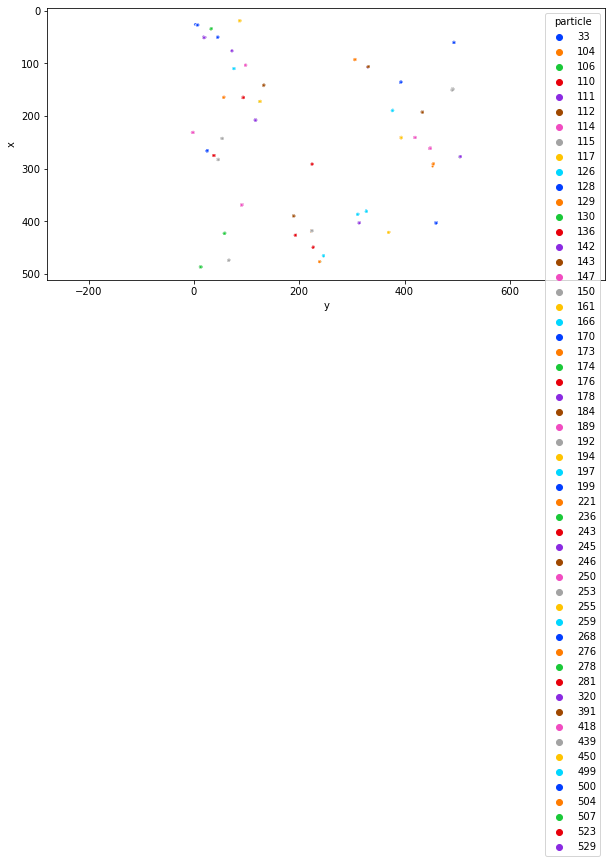

In [36]:
import seaborn as sns
sns.scatterplot(data=tm2, x="y",y="x", hue="particle", palette="bright", s=5)
#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.axis('equal')

In [38]:
tm2.to_csv('.csv') 

# Instantaneous speed Calculation.
make sure to change pixels to micron and 1/frames per second

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 20.8007859] [loc=0.171 scale=0.110]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


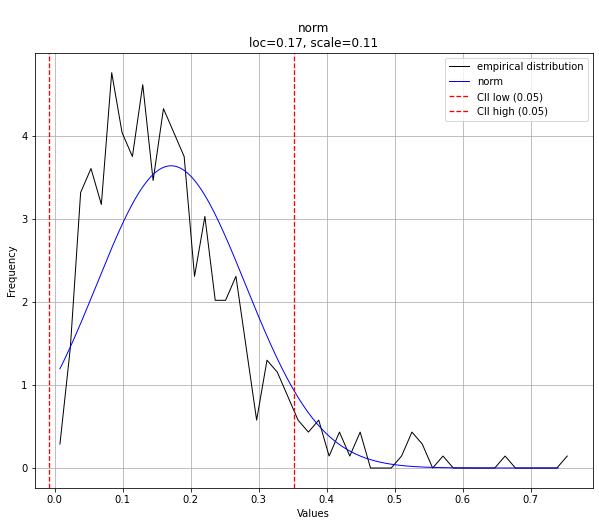

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 610.5097657] [loc=0.073 scale=0.076]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


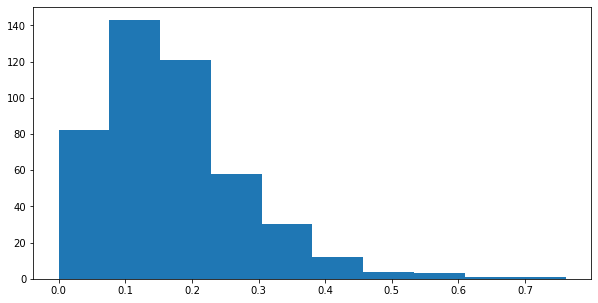

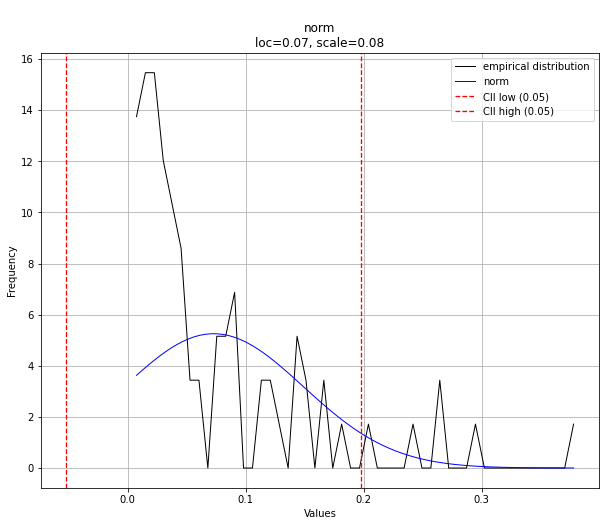

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 39.7195756] [loc=0.190 scale=0.114]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


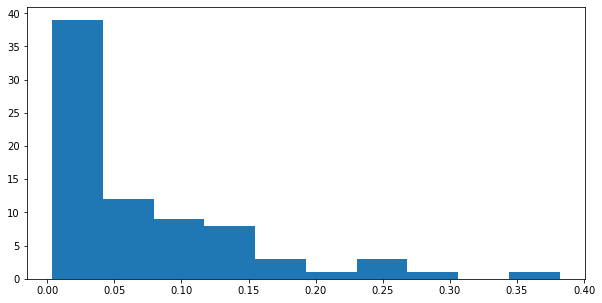

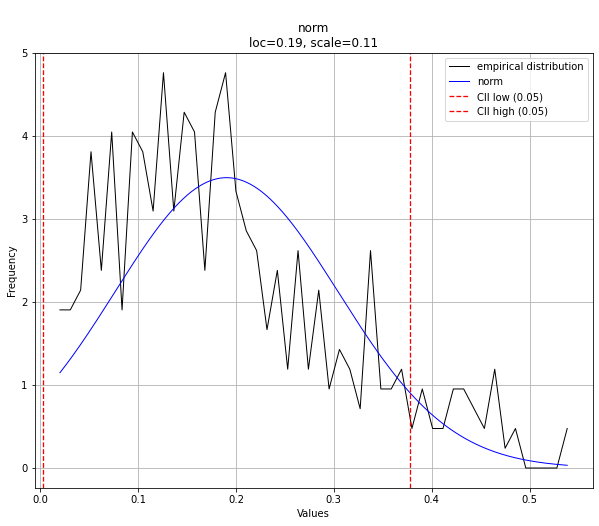

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 92.3530388] [loc=0.142 scale=0.092]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


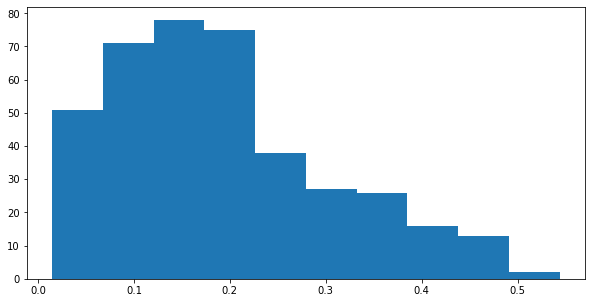

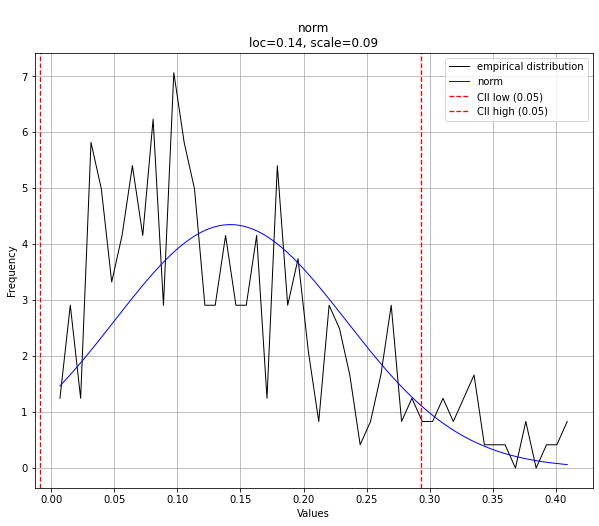

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 54.3086817] [loc=0.163 scale=0.099]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


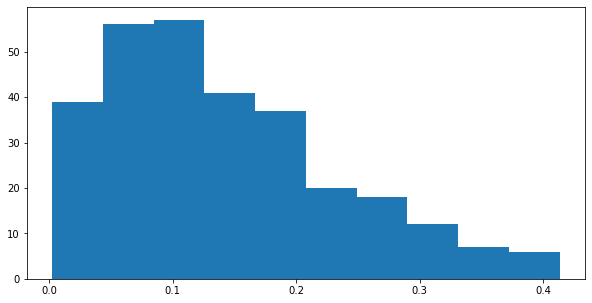

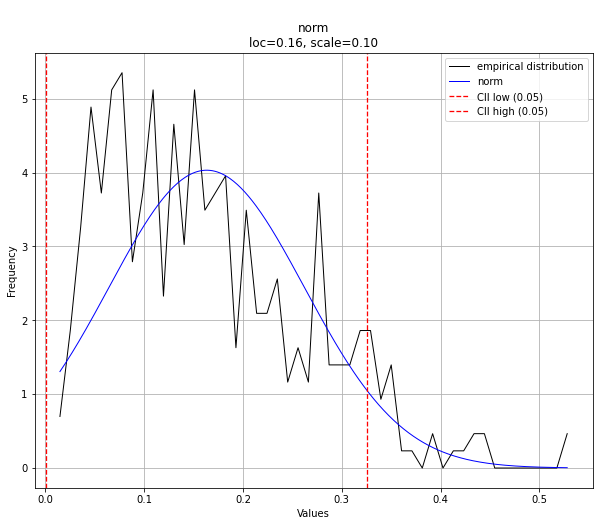

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 29.3720145] [loc=0.169 scale=0.106]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


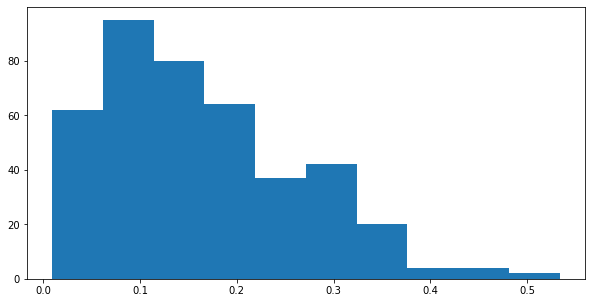

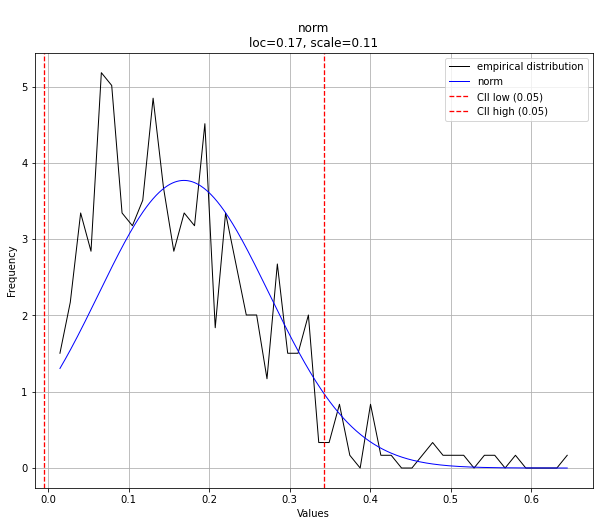

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 29.1659396] [loc=0.202 scale=0.127]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


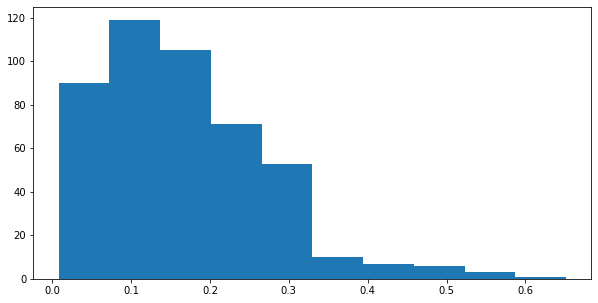

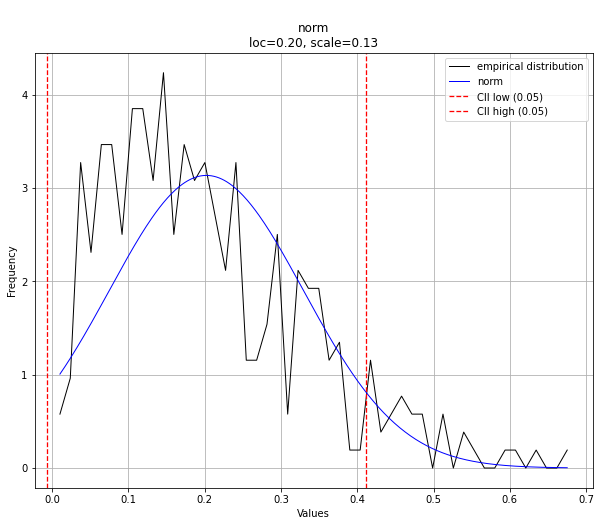

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 26.4560726] [loc=0.182 scale=0.106]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


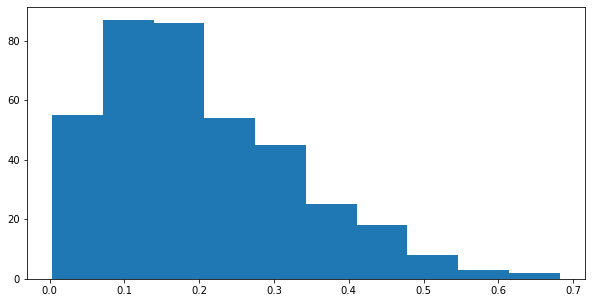

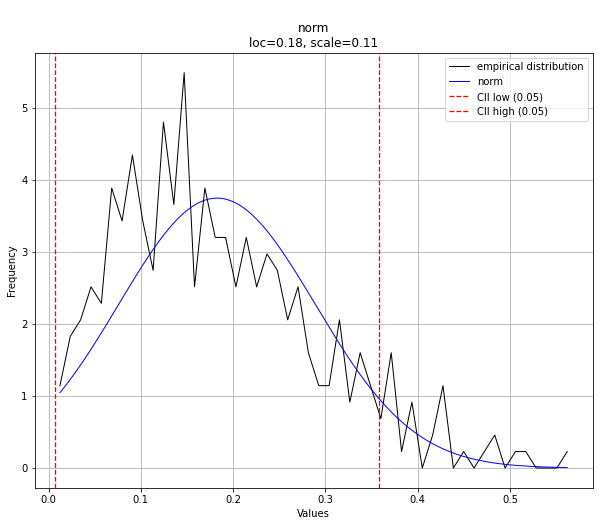

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 31.6853002] [loc=0.182 scale=0.123]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


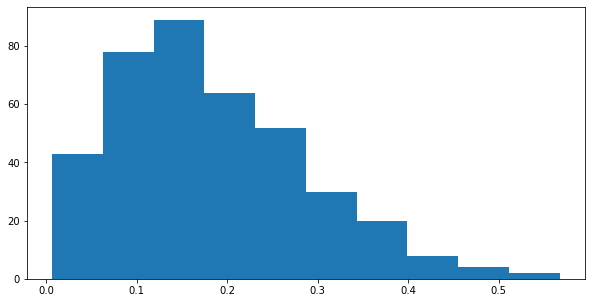

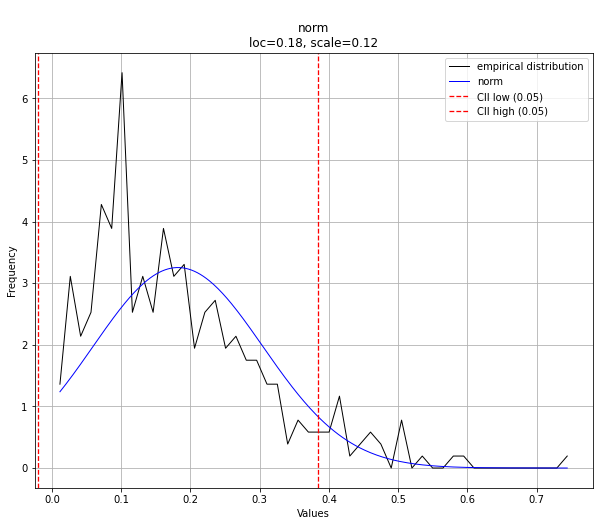

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 157.8417278] [loc=0.211 scale=0.105]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


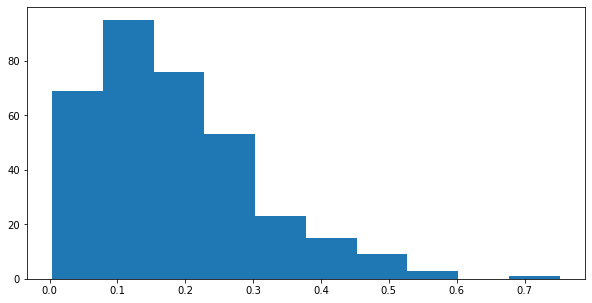

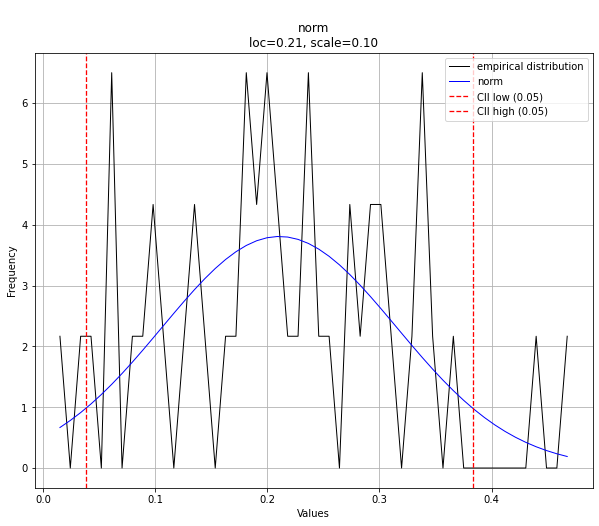

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 71.2364245] [loc=0.156 scale=0.113]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


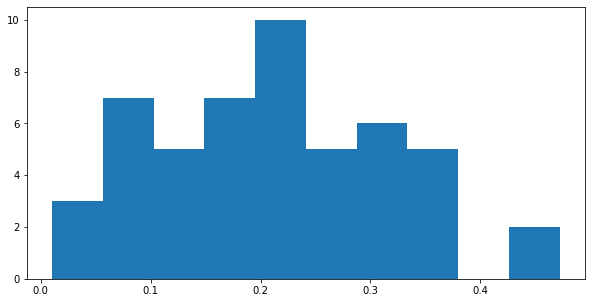

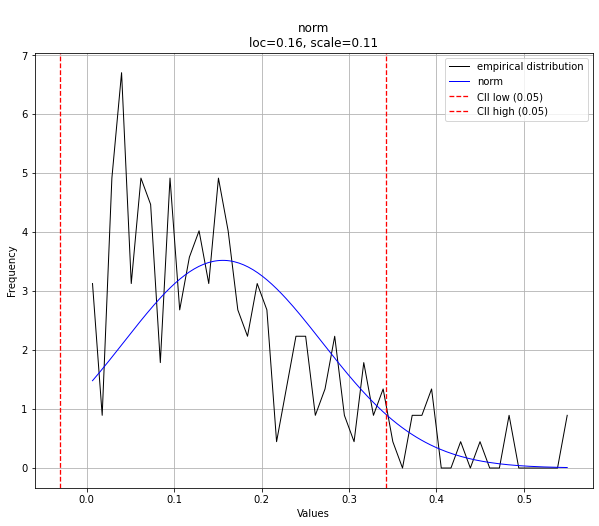

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 74.6337053] [loc=0.225 scale=0.144]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


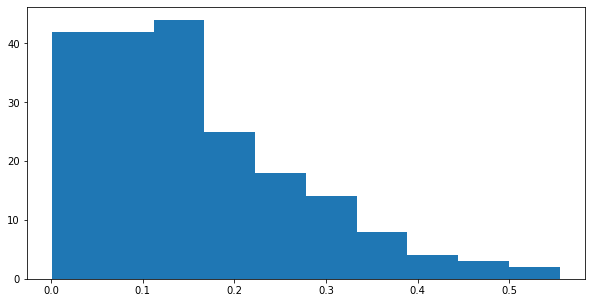

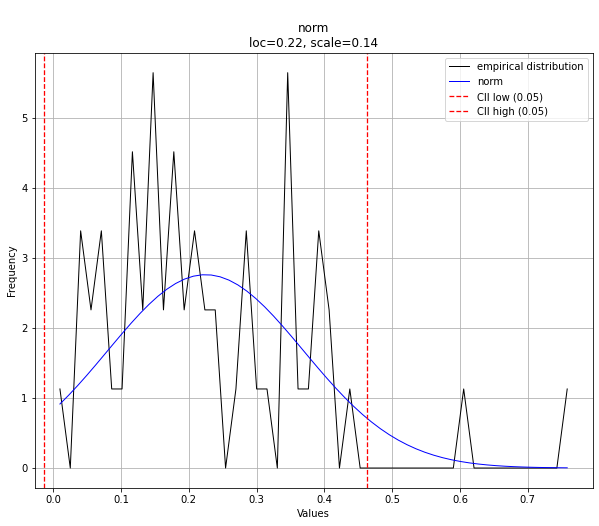

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 49.4872667] [loc=0.170 scale=0.113]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


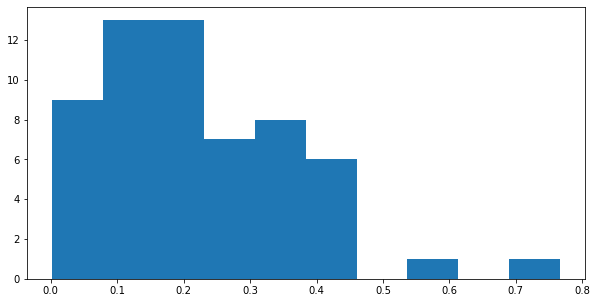

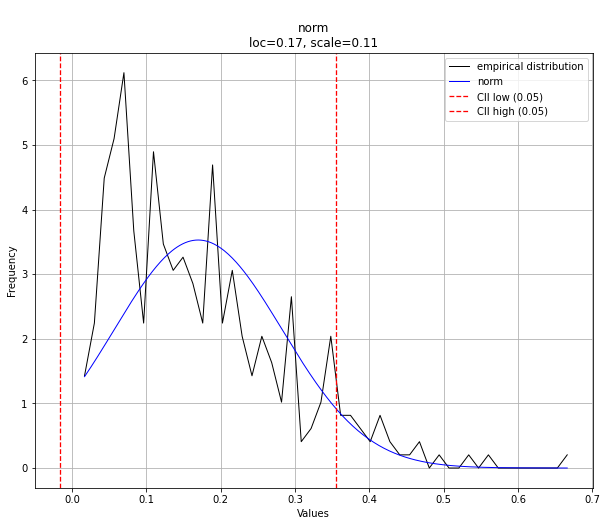

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 416.4730115] [loc=0.172 scale=0.103]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


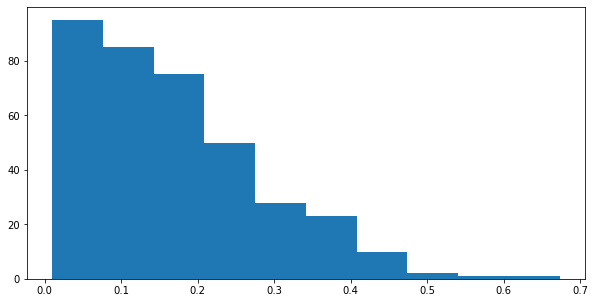

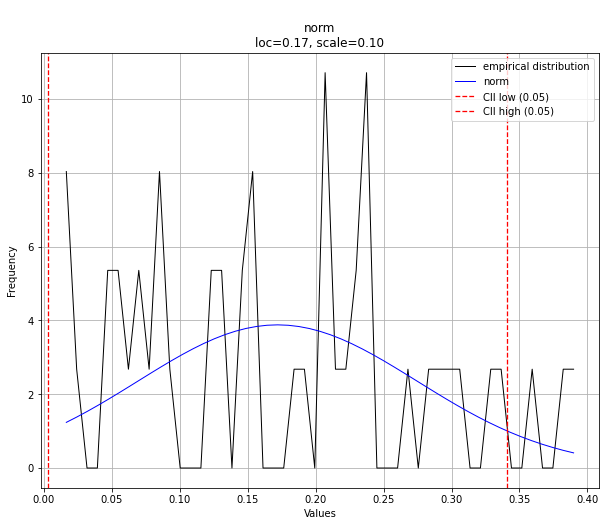

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 136.6845435] [loc=0.209 scale=0.153]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


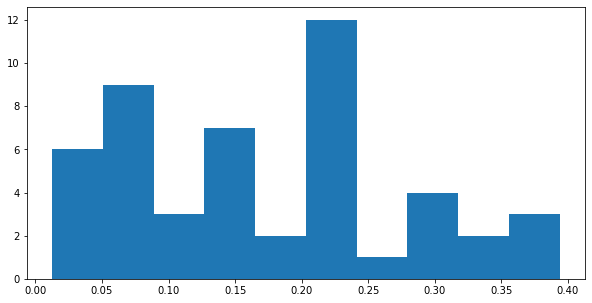

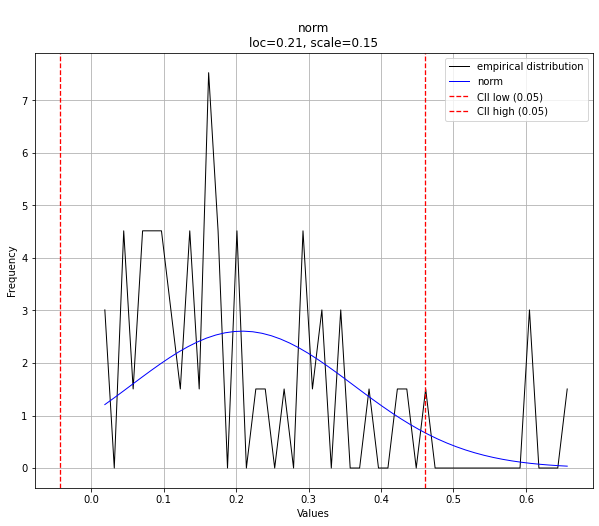

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 57.7059550] [loc=0.135 scale=0.105]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


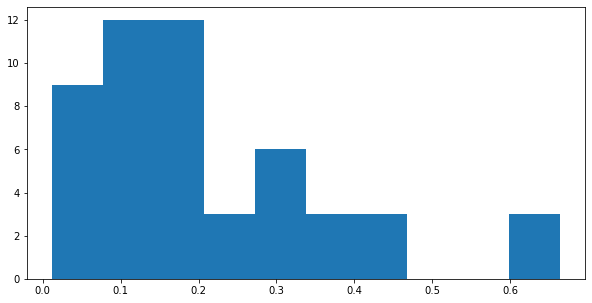

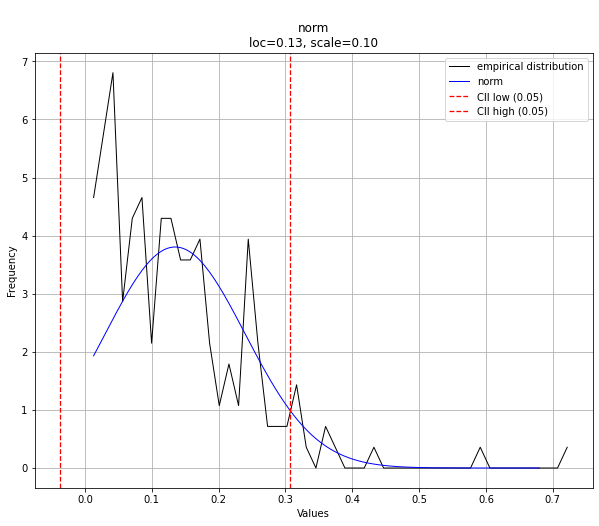

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 27.4780755] [loc=0.203 scale=0.146]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


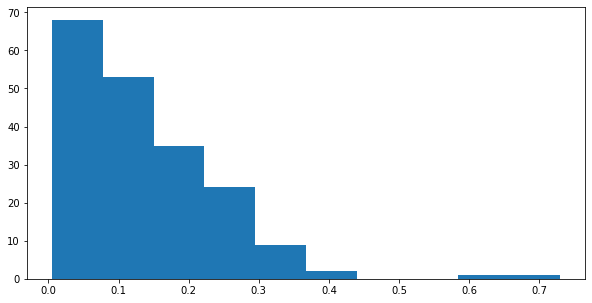

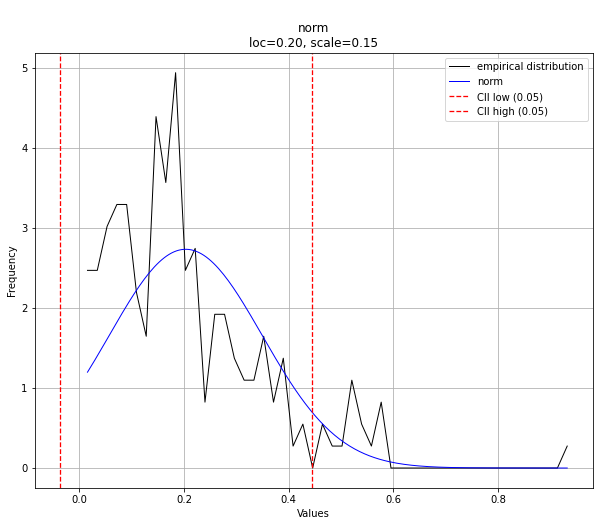

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 19.1868219] [loc=0.259 scale=0.176]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


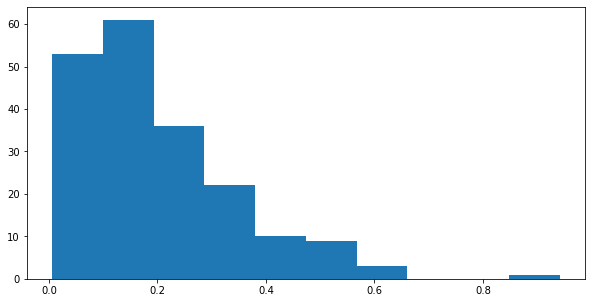

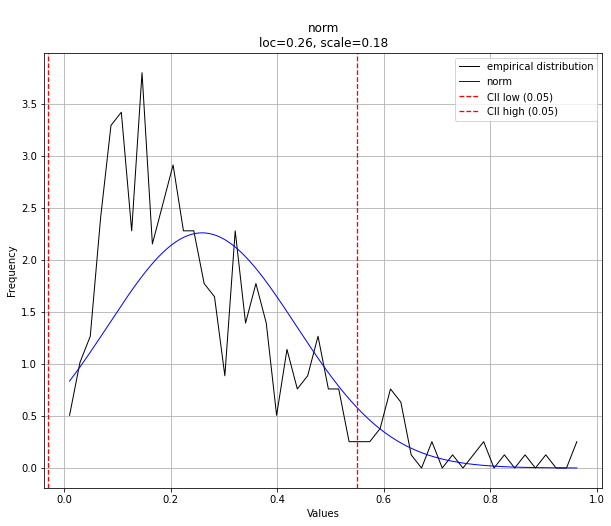

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 166.8055890] [loc=0.120 scale=0.112]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


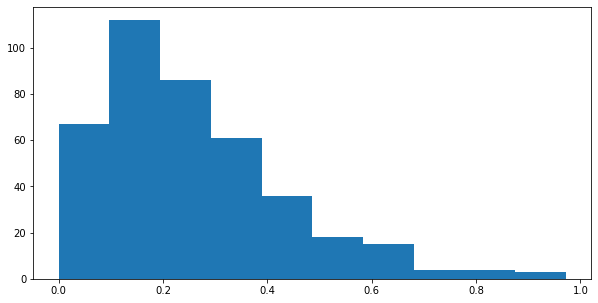

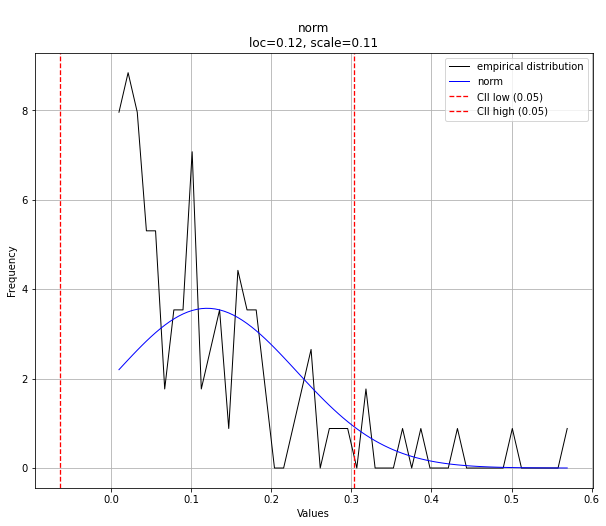

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 67.0170376] [loc=0.159 scale=0.105]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


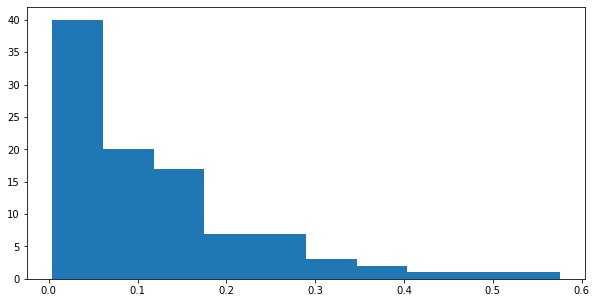

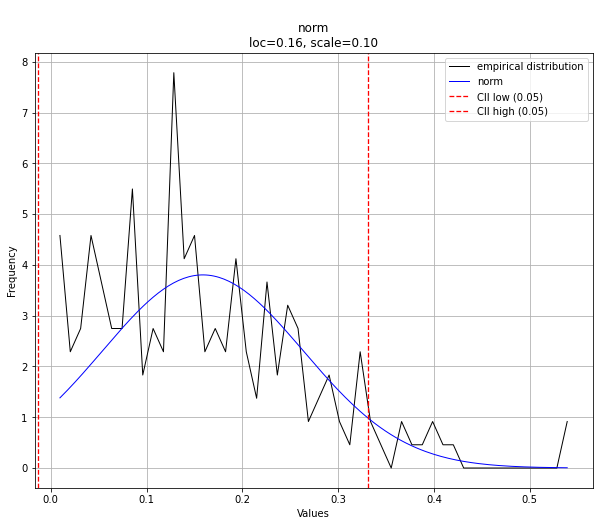

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 38.3817090] [loc=0.166 scale=0.123]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


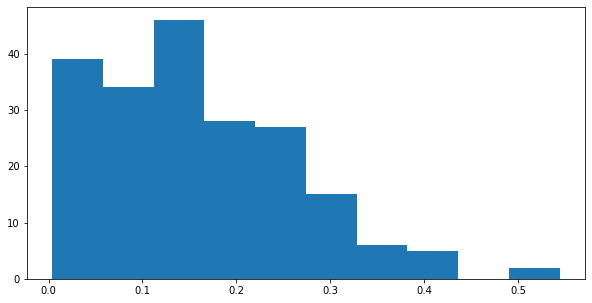

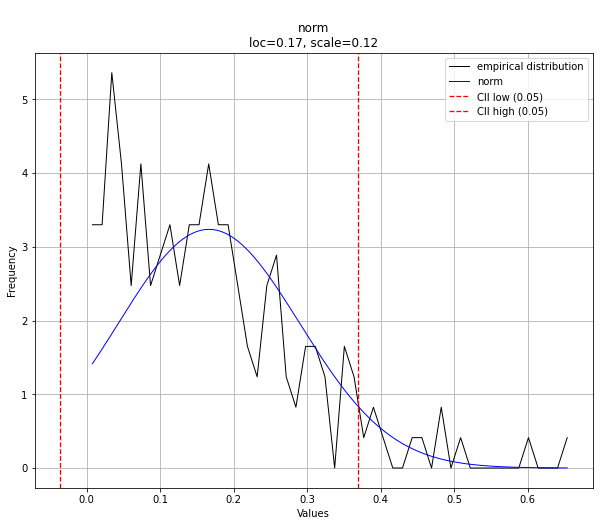

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 73.4857215] [loc=0.155 scale=0.116]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


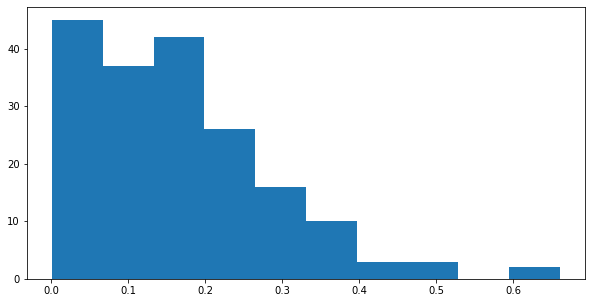

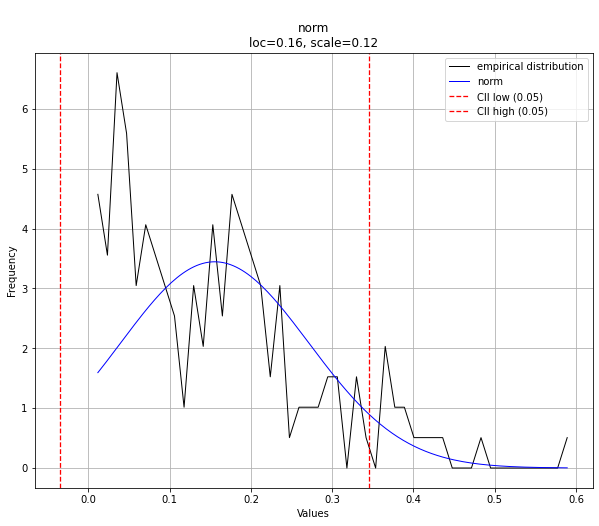

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 224.9075411] [loc=0.166 scale=0.100]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


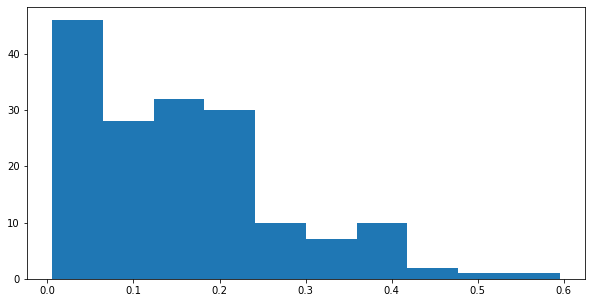

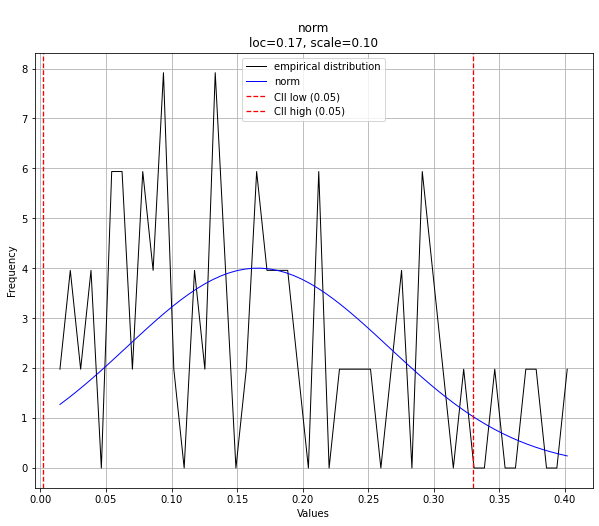

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 58.2180079] [loc=0.160 scale=0.105]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


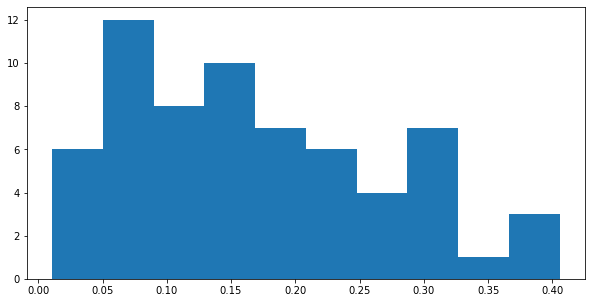

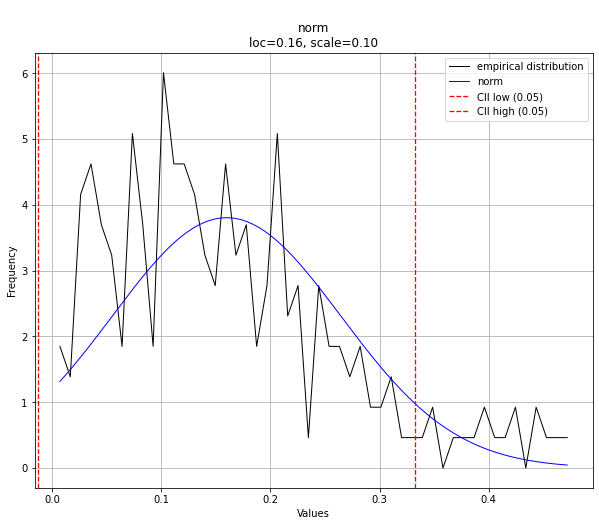

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 24.0742358] [loc=0.200 scale=0.120]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


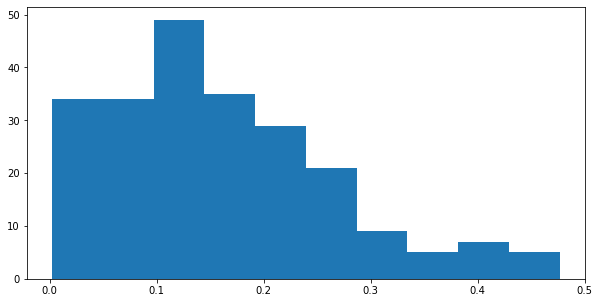

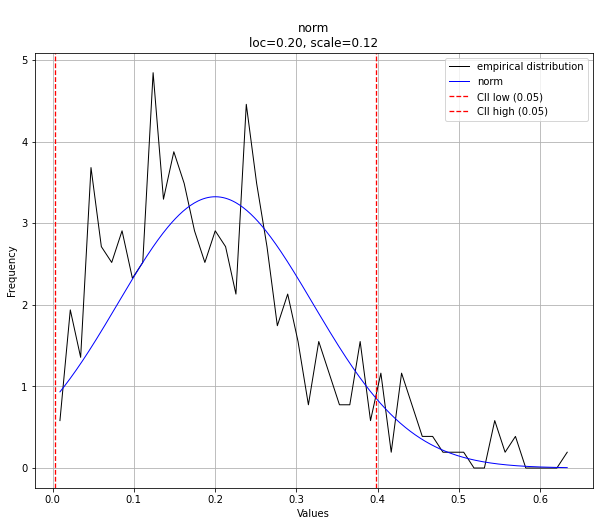

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 21.9829619] [loc=0.175 scale=0.101]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


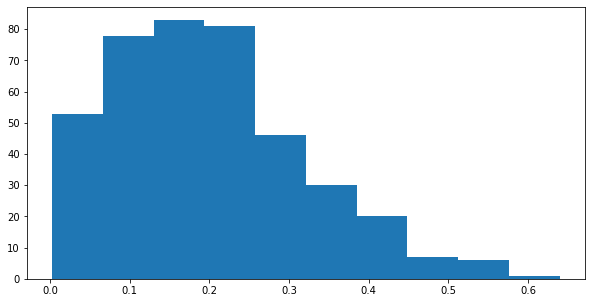

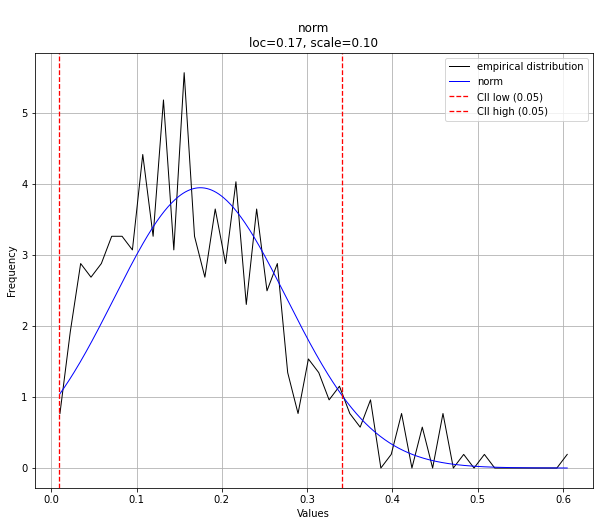

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 524.9278091] [loc=0.078 scale=0.078]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


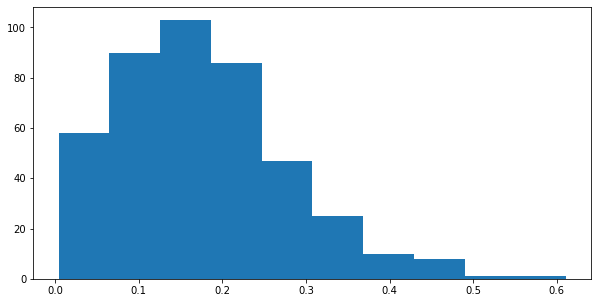

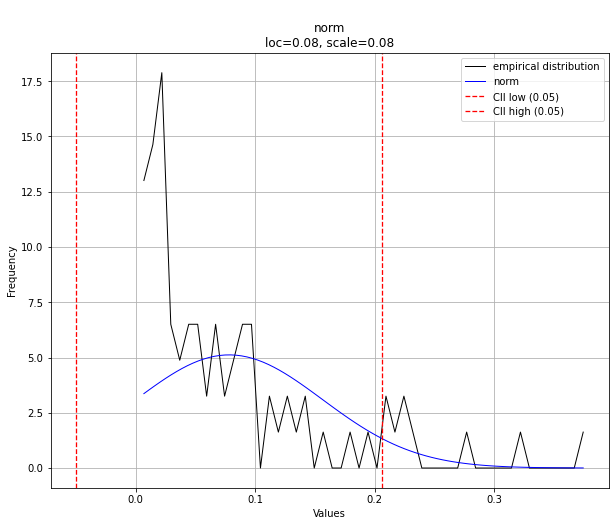

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 374.9342949] [loc=0.109 scale=0.107]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


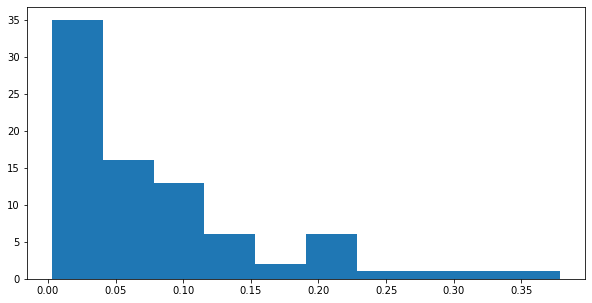

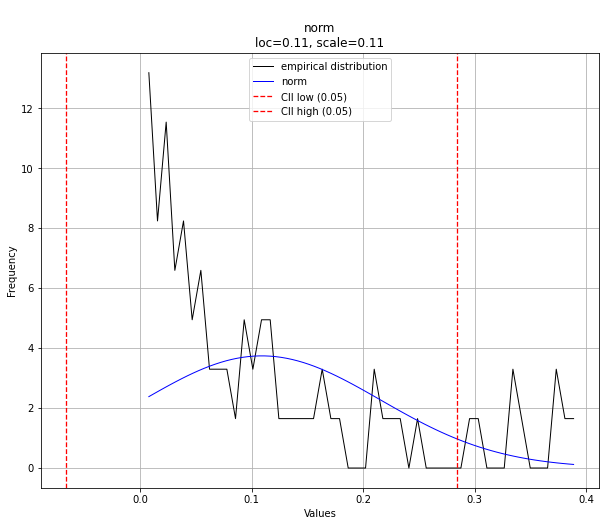

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 149.3932408] [loc=0.118 scale=0.095]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


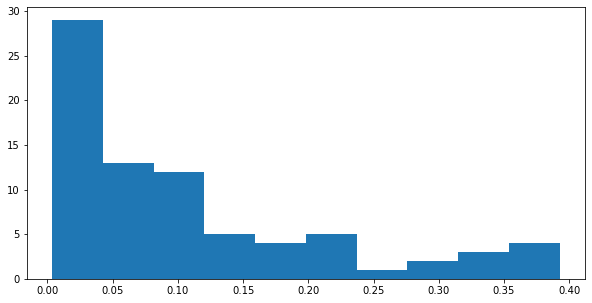

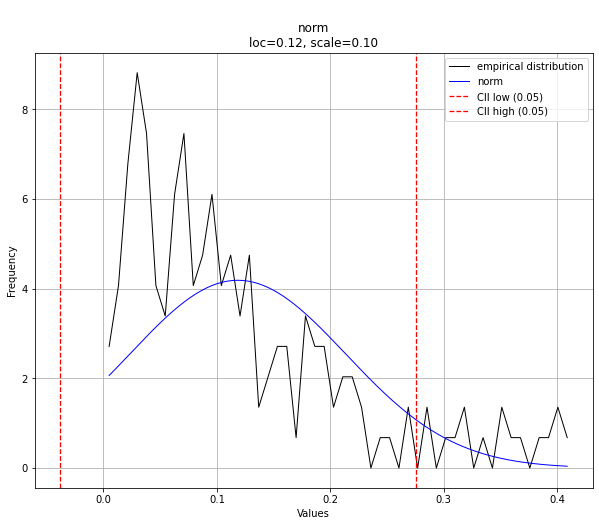

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 36.5373726] [loc=0.165 scale=0.110]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


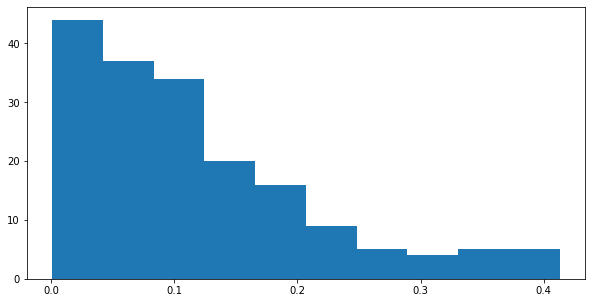

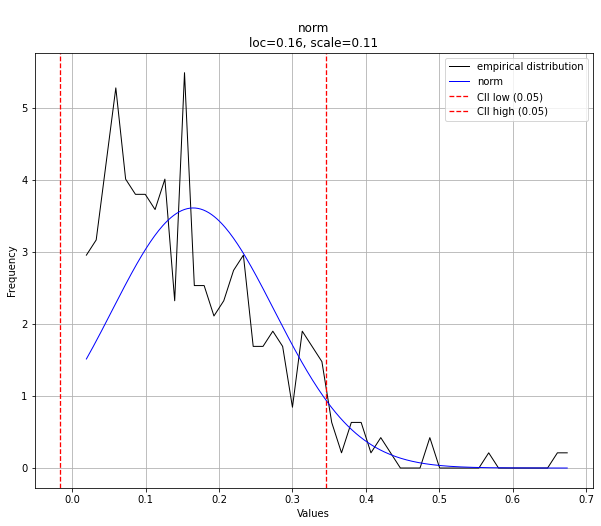

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 270.5740741] [loc=0.098 scale=0.097]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


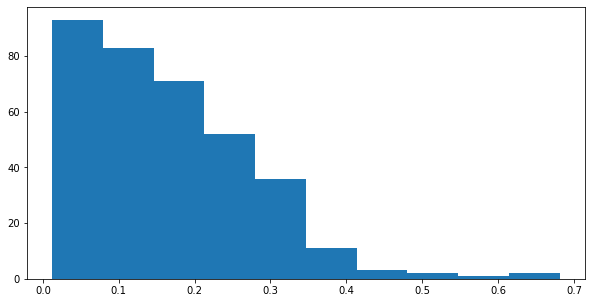

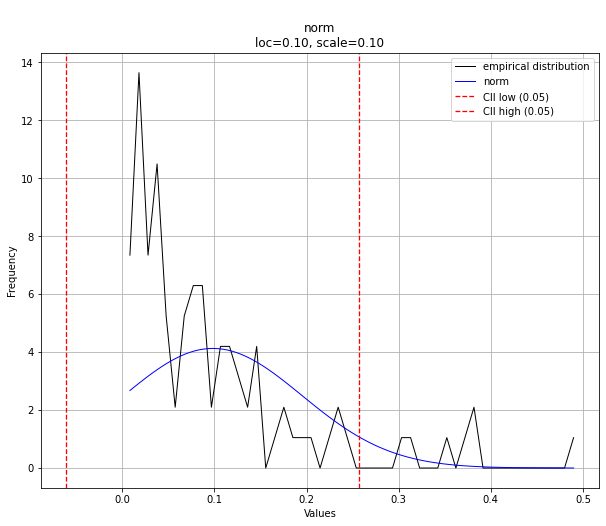

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 65.7711790] [loc=0.149 scale=0.096]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


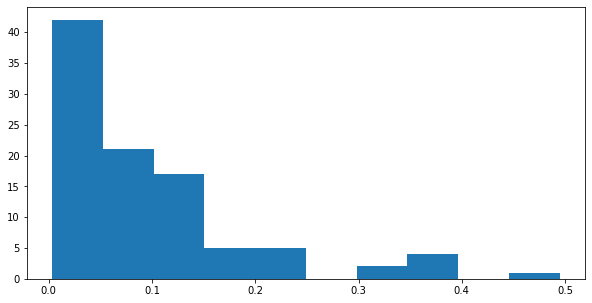

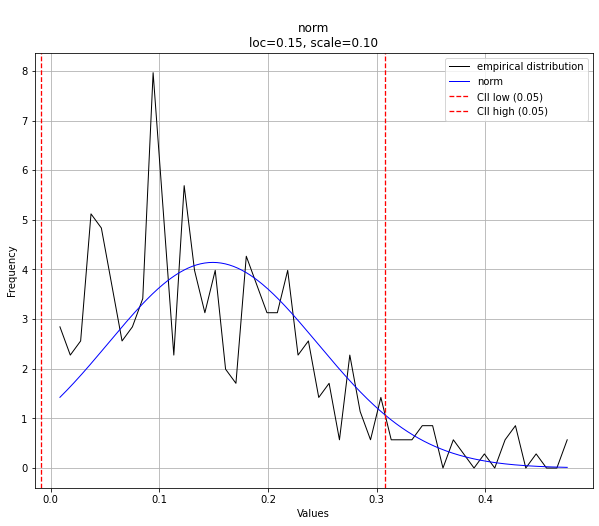

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 279.1035070] [loc=0.128 scale=0.108]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


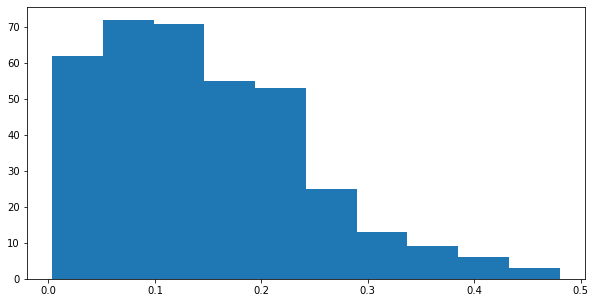

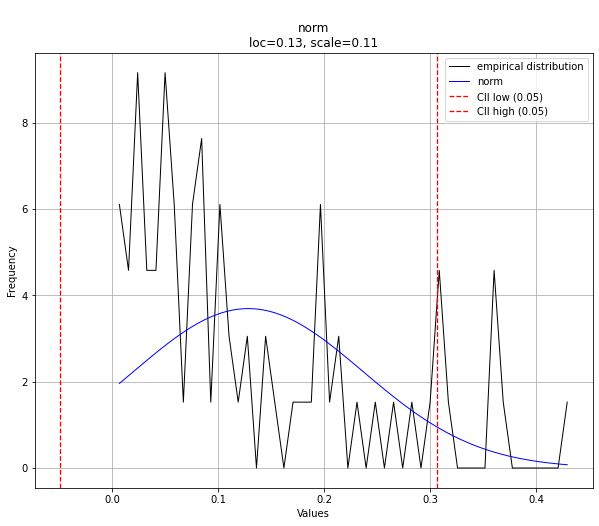

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 82.1947810] [loc=0.127 scale=0.104]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


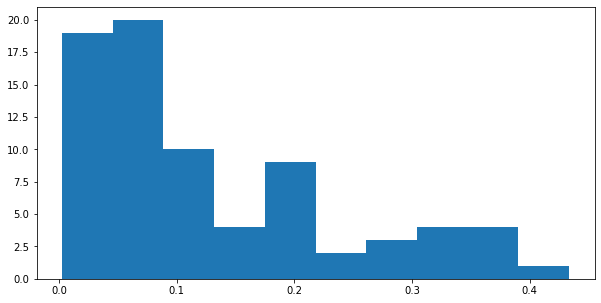

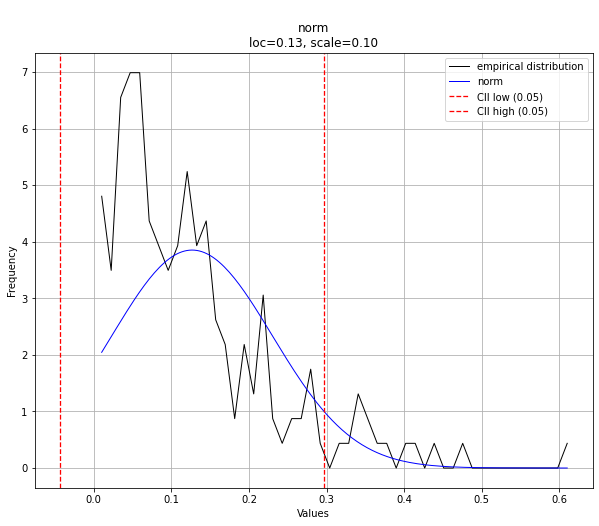

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 47.0286458] [loc=0.162 scale=0.146]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


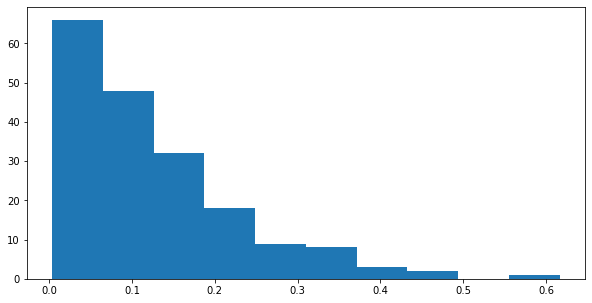

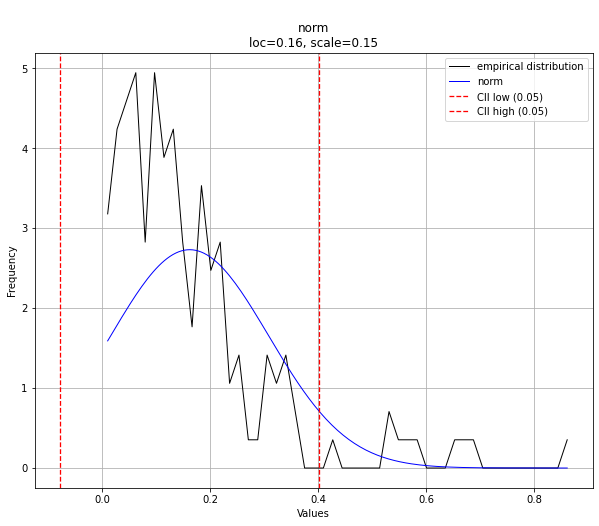

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 316.0779861] [loc=0.115 scale=0.097]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


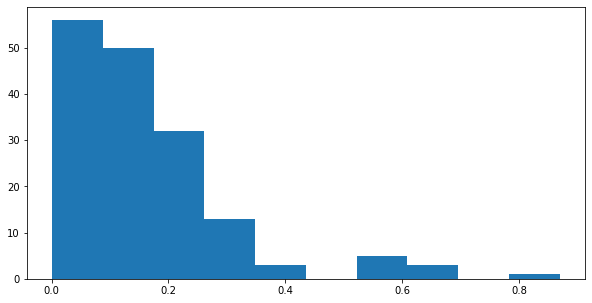

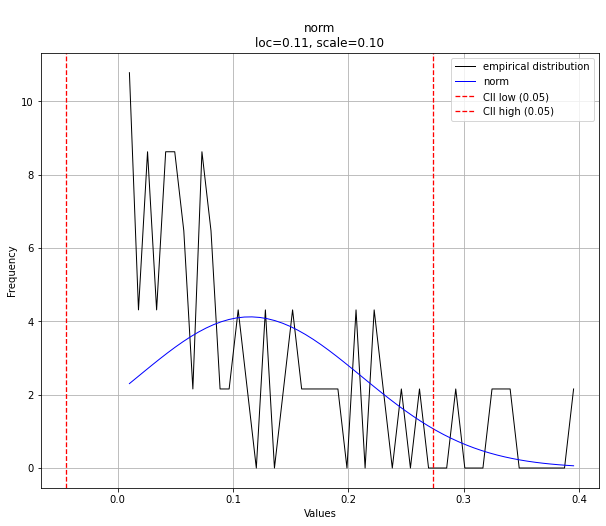

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 1451.7696694] [loc=0.065 scale=0.061]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


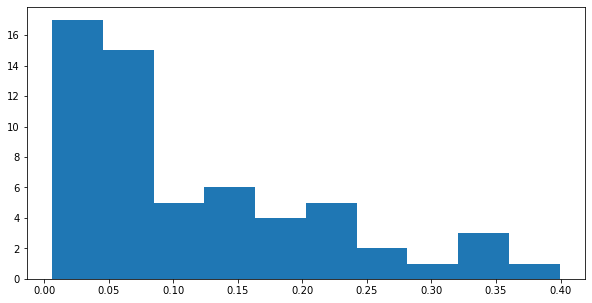

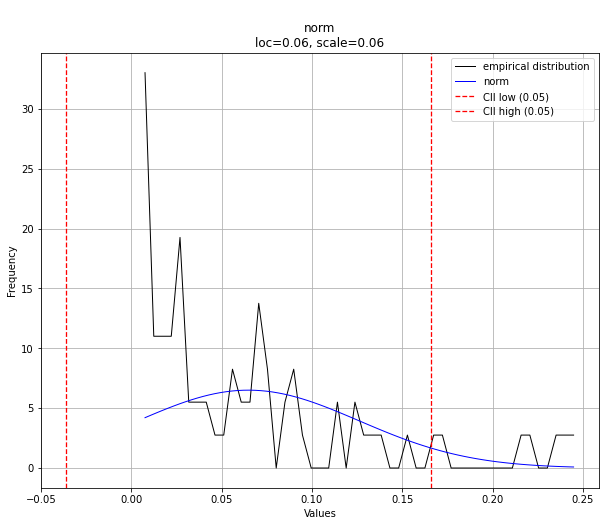

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 464.4350903] [loc=0.079 scale=0.086]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


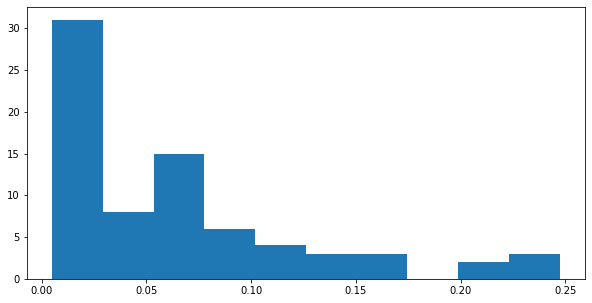

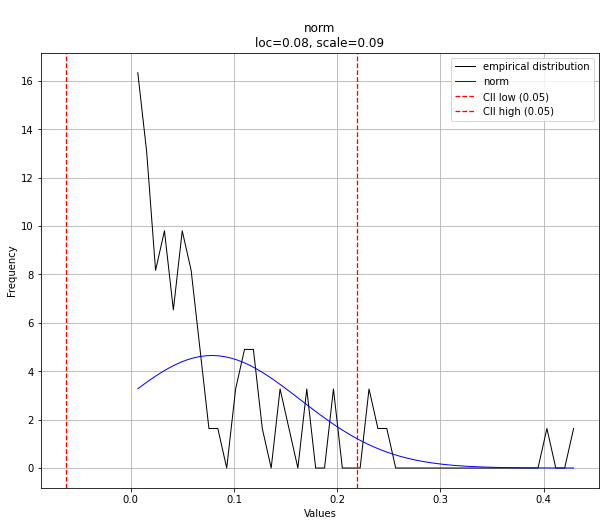

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 117.7256197] [loc=0.168 scale=0.110]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


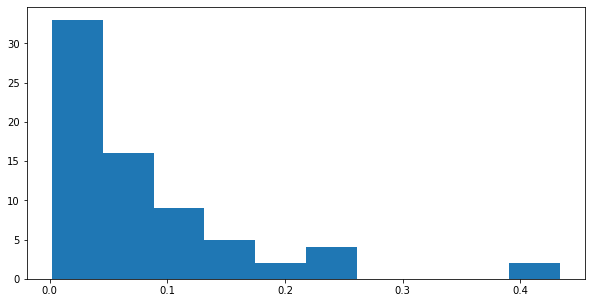

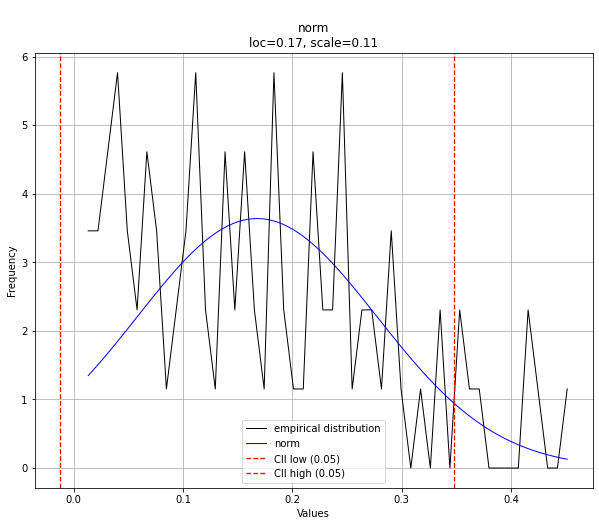

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 290.7391885] [loc=0.100 scale=0.085]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


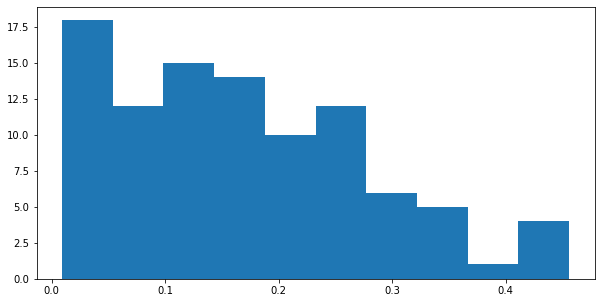

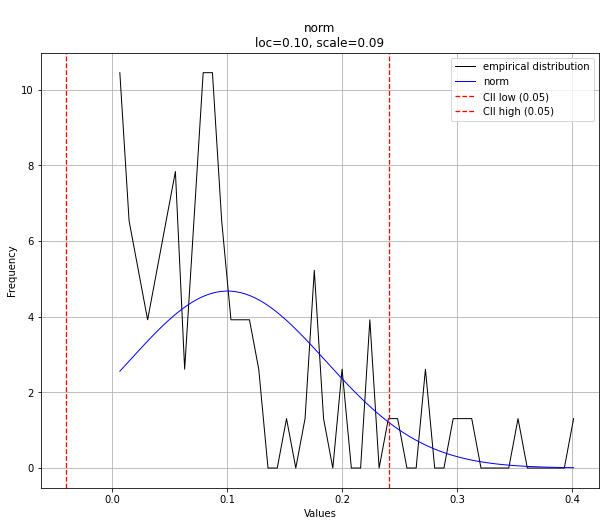

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 707.3812094] [loc=0.070 scale=0.077]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


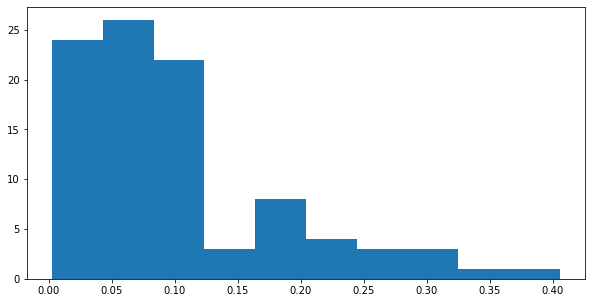

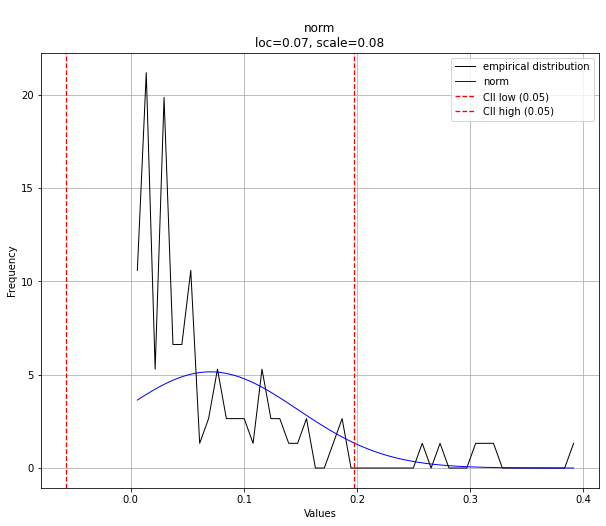

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 96.6373171] [loc=0.184 scale=0.111]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


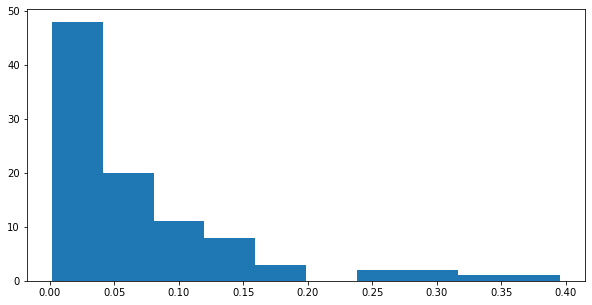

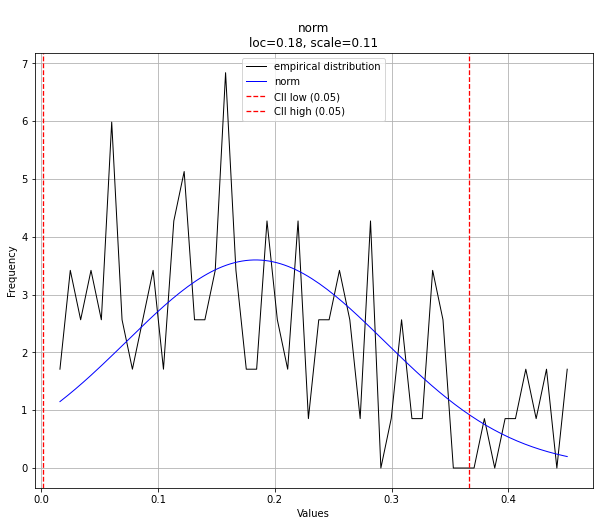

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 161.0331848] [loc=0.173 scale=0.111]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


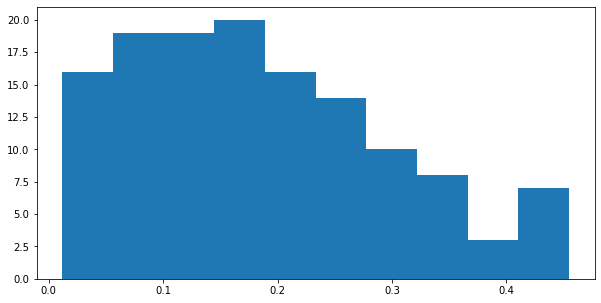

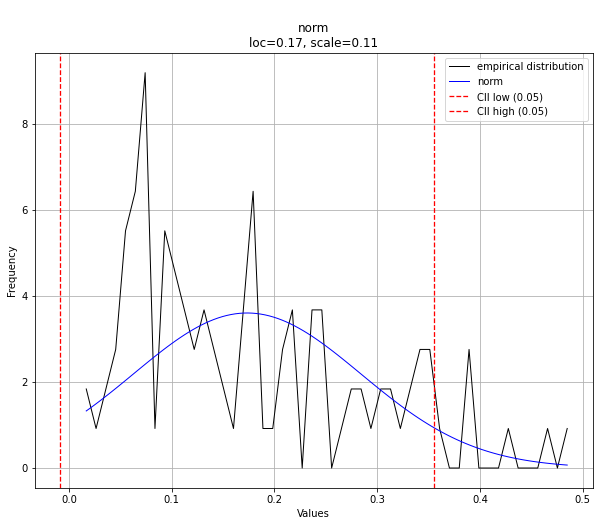

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 130.7723713] [loc=0.202 scale=0.132]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


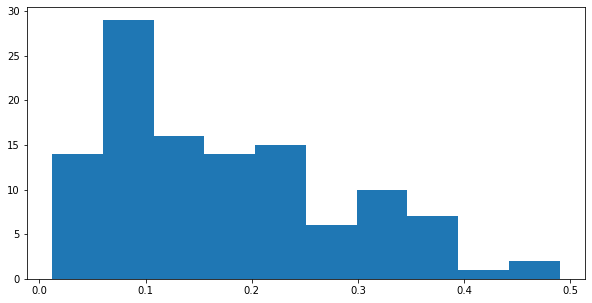

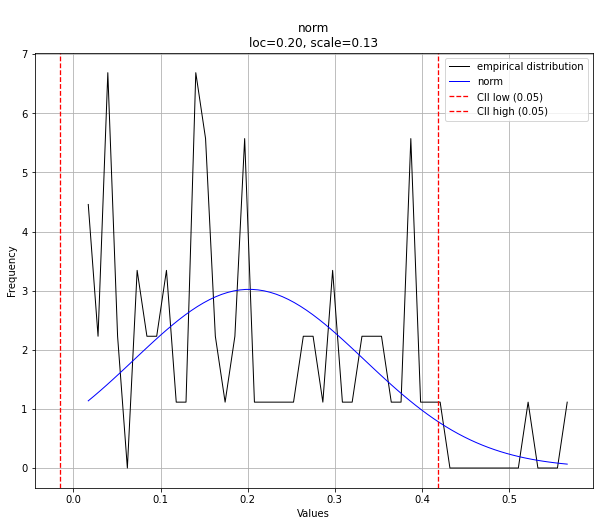

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 858.0273642] [loc=0.085 scale=0.072]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


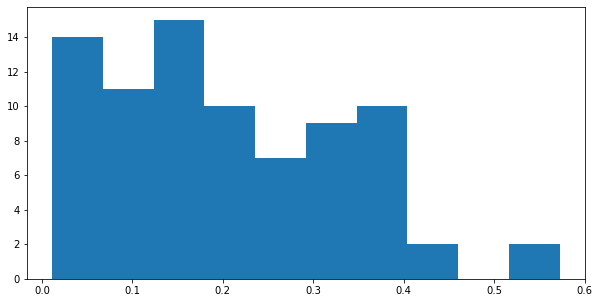

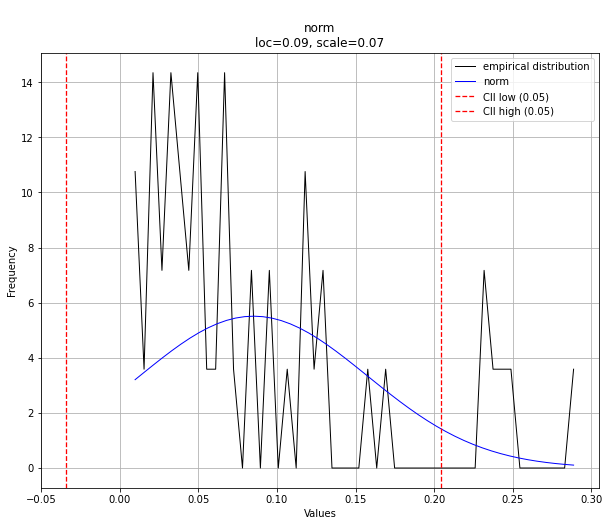

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 505.0213054] [loc=0.126 scale=0.104]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


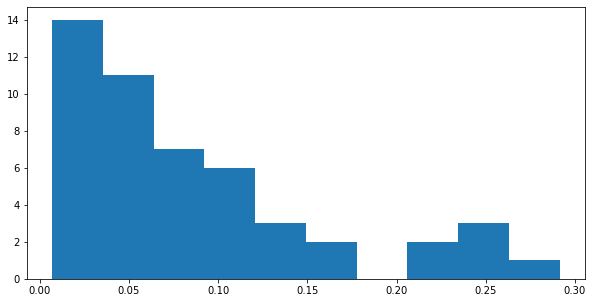

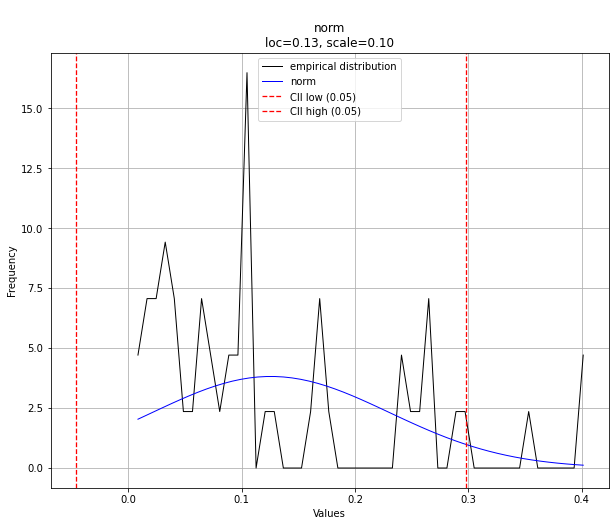

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 190.2763370] [loc=0.130 scale=0.108]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


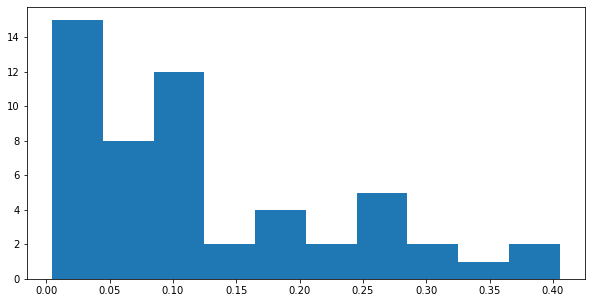

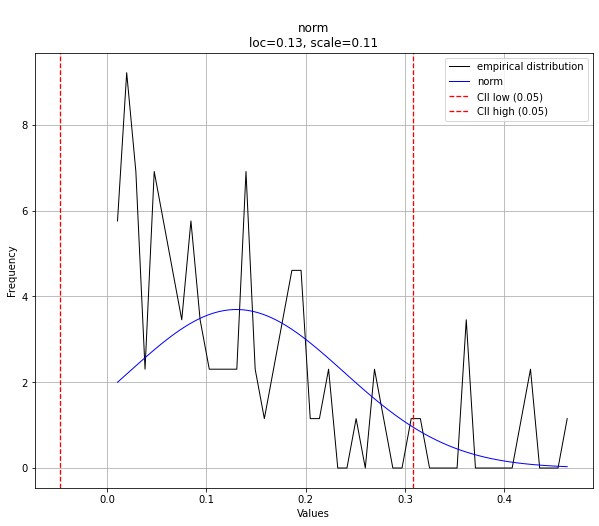

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 147.5527205] [loc=0.218 scale=0.129]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


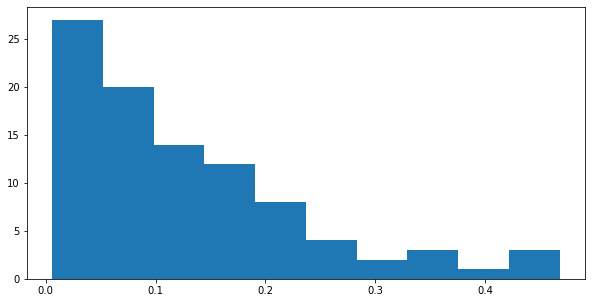

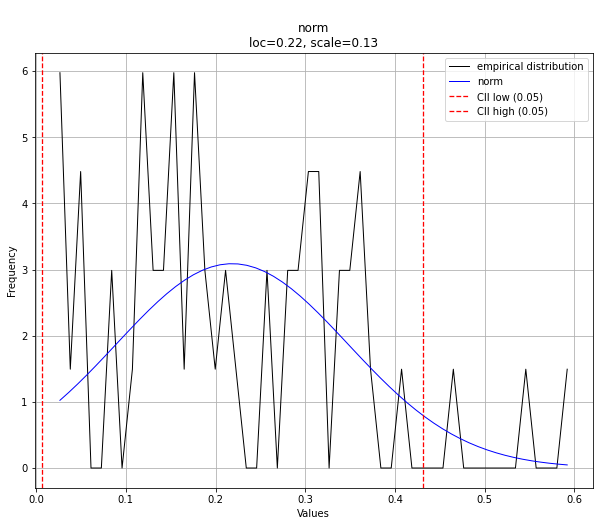

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 157.4746401] [loc=0.166 scale=0.104]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


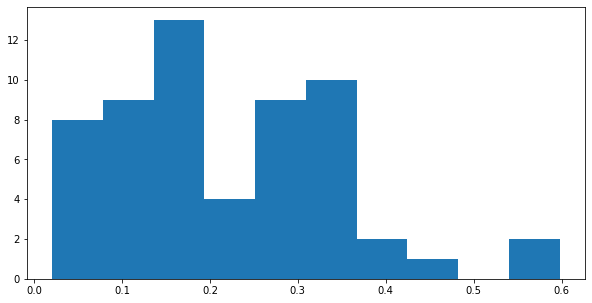

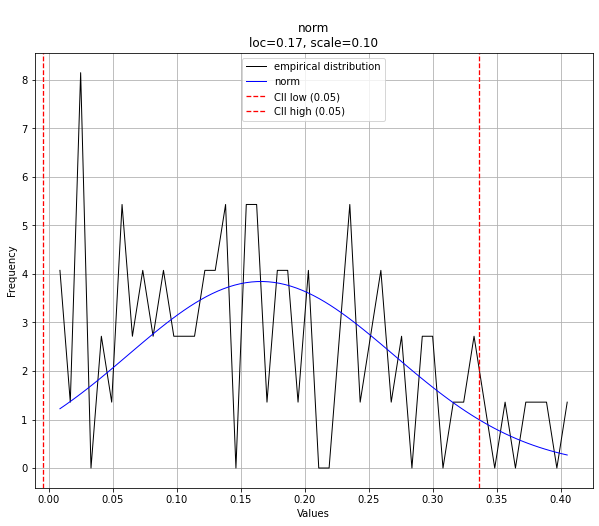

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 563.3771832] [loc=0.079 scale=0.071]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


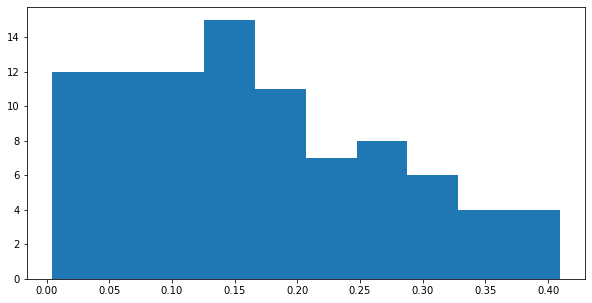

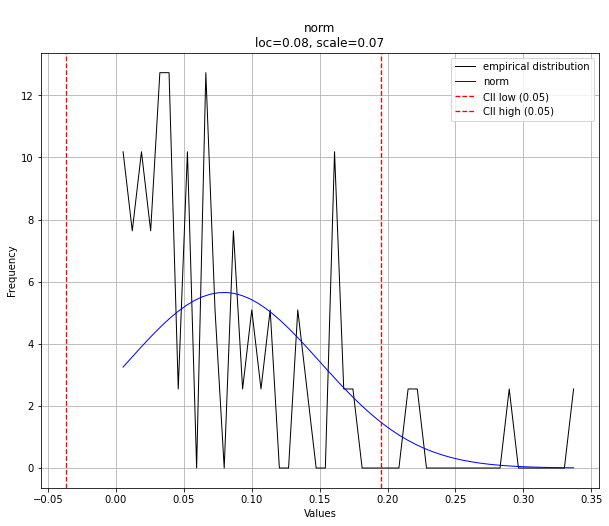

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 59.2473944] [loc=0.198 scale=0.127]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


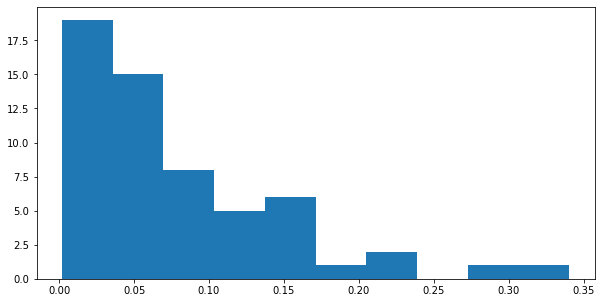

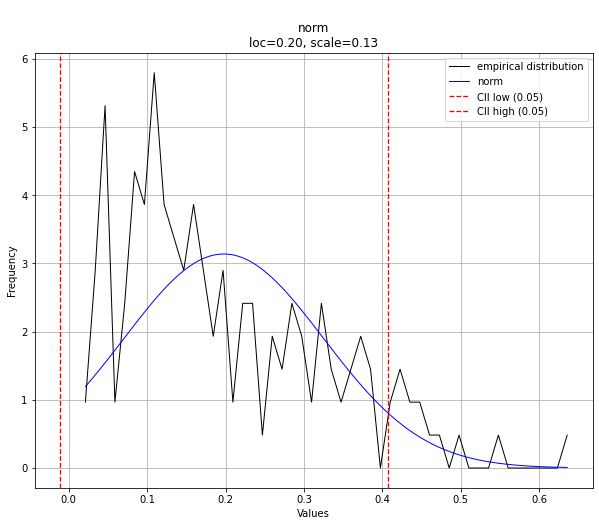

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 298.0506025] [loc=0.089 scale=0.077]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


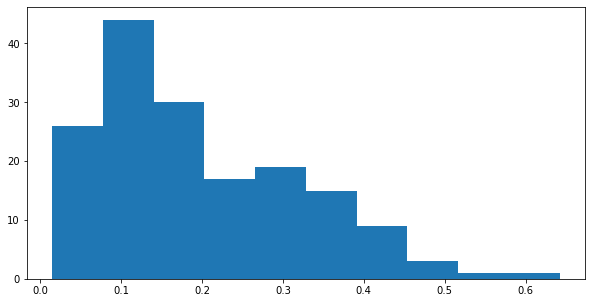

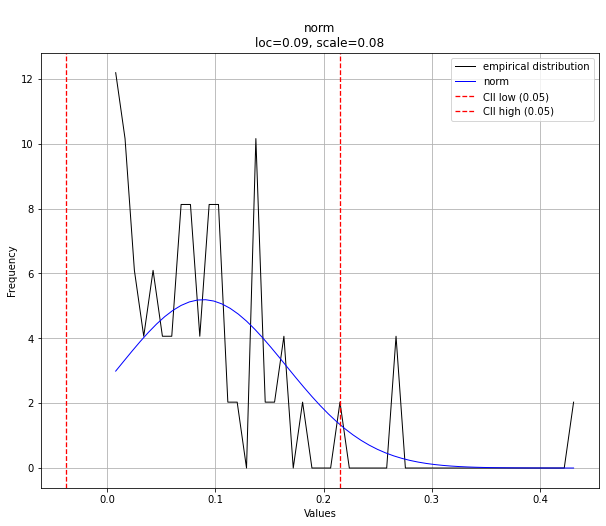

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 153.9811991] [loc=0.155 scale=0.121]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


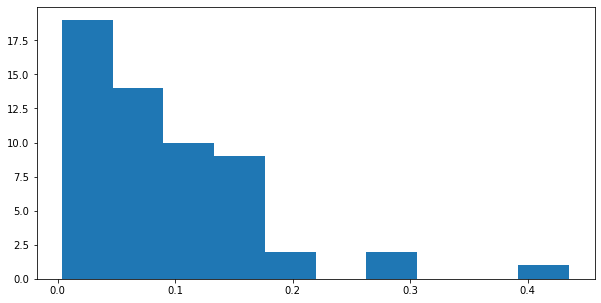

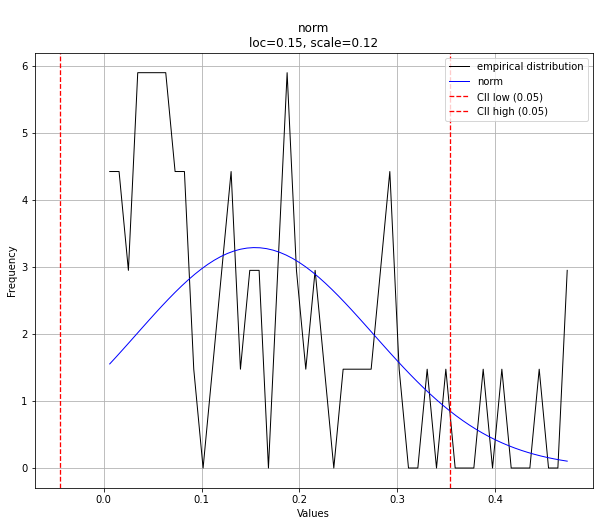

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 310.0200100] [loc=0.125 scale=0.101]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


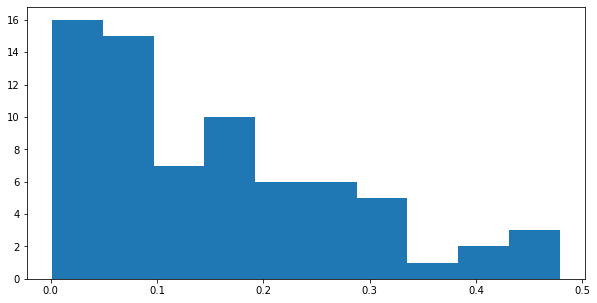

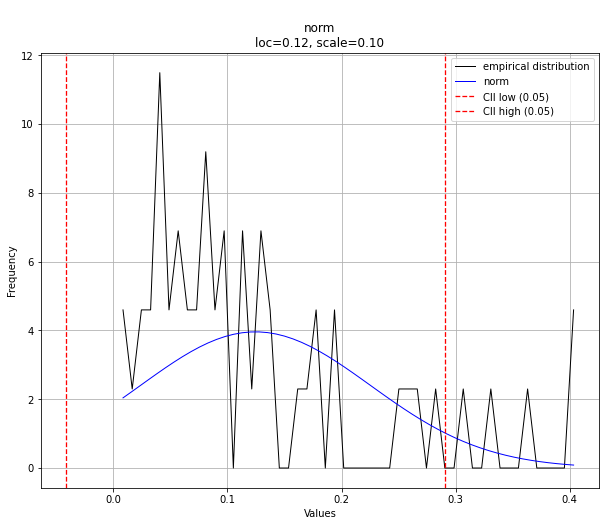

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 135.7457632] [loc=0.177 scale=0.121]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


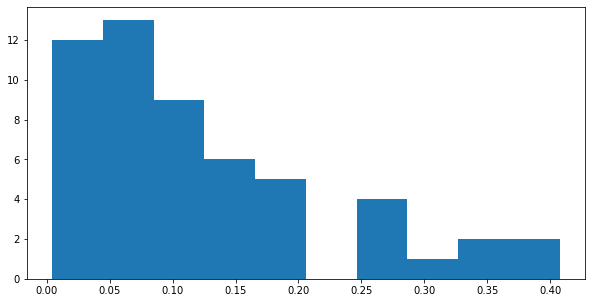

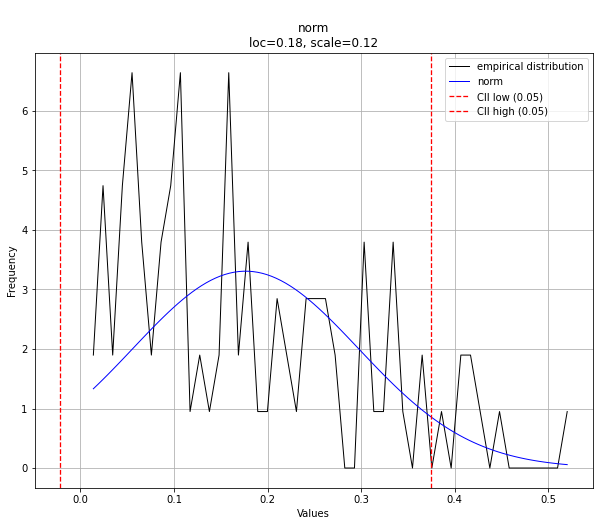

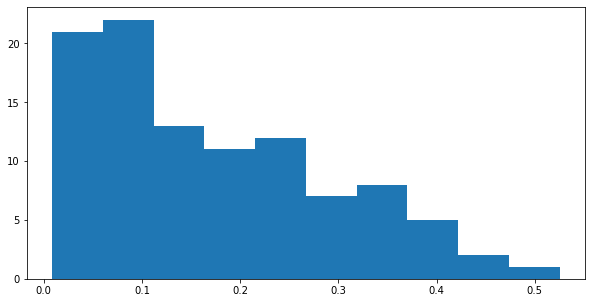

In [39]:
mu=[]
r=[]
r1=[]
for ii in q:
    track=tm2.loc[tm2.particle==ii, ['frameN', 'x','y','particle']]
    x=track["x"]
    x1=np.diff(x)
    y=track["y"]
    y1=np.diff(y)
    
    dist=np.sqrt((x1)**2 + (y1)**2)
    dist=dist * 0.14    #(change pixel to micron)
    
    time=track["frameN"]
    time=np.diff(time)
    time =(time*0.317) #(change 1/frames per second)
    
    speed =(dist/time)
    
    
    
    
    from distfit import distfit
    speed2 = distfit(distr='norm')
    speed2.fit_transform(speed)
    speed2.plot()
    mu2=speed2.model['loc']
    mu +=[mu2]
    plt.figure()
    plt.hist(speed)
  


In [40]:
mu=np.array(mu)

In [41]:
#mu = mu[(mu >= 0) & (mu <= 3)]

In [42]:
mu

array([0.17114428, 0.0730259 , 0.19045903, 0.14196234, 0.1632985 ,
       0.16880763, 0.20234753, 0.18247057, 0.18199872, 0.21078817,
       0.15586835, 0.2247649 , 0.16964153, 0.17195261, 0.20860228,
       0.13487962, 0.20328327, 0.25864499, 0.1197322 , 0.15867188,
       0.16643741, 0.15543904, 0.16572012, 0.15978887, 0.20032601,
       0.17488768, 0.07833472, 0.10895449, 0.11839994, 0.1647004 ,
       0.09840929, 0.1491361 , 0.1284176 , 0.12662155, 0.16170381,
       0.11467903, 0.06476419, 0.07851938, 0.16788334, 0.10033478,
       0.07028644, 0.1835626 , 0.17349974, 0.20173852, 0.08513574,
       0.12582658, 0.13033101, 0.21847226, 0.16572066, 0.07942756,
       0.19771095, 0.08860578, 0.1546547 , 0.12461889, 0.17661832])

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 1298.4752049] [loc=0.152 scale=0.044]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


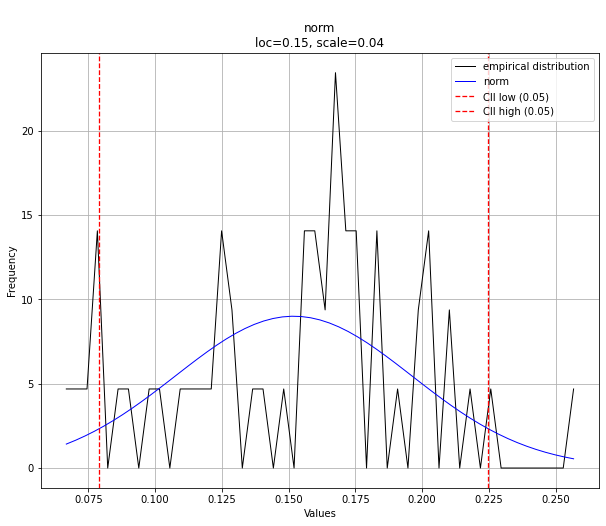

(array([ 8.,  6.,  7., 19.,  9.,  5.,  1.]),
 array([0.06476419, 0.09246145, 0.12015871, 0.14785597, 0.17555322,
        0.20325048, 0.23094774, 0.25864499]),
 <BarContainer object of 7 artists>)

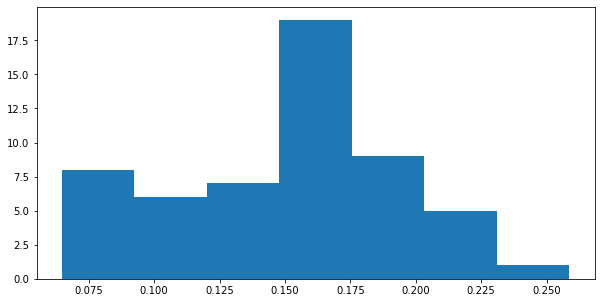

In [43]:
 from distfit import distfit
mumu = distfit(distr='norm')
mumu.fit_transform(mu)
mumu.plot()
plt.hist(mu, bins="auto")  

In [44]:
mumu.model

{'distr': <scipy.stats._continuous_distns.norm_gen at 0x7f020c8e7df0>,
 'stats': 'RSS',
 'params': (0.15185475972023169, 0.04431141680892902),
 'name': 'norm',
 'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x7f01fa27a970>,
 'score': 1298.4752049373506,
 'loc': 0.15185475972023169,
 'scale': 0.04431141680892902,
 'arg': (),
 'CII_min_alpha': 0.07896896506670632,
 'CII_max_alpha': 0.224740554373757}

# 6.4 Analyze trajectories
Trackpy includes several functions to help with some common analyses for particle trajectories. (See the "Static Analysis" and "Motion Analysis" sections of the API reference.)
Here, we can show that these data are consistent with colloidal particles undergoing Brownian motion in water.

# Mean Squared Displacement of Individual Probes
Compute the mean squared displacement (MSD) of each particle using the imsd function, and plot MSD vs. lag time.

In [45]:
im = tp.imsd(tm, 0.14, 3.15)  # microns per pixel = 0.07, frames per second = 15.54

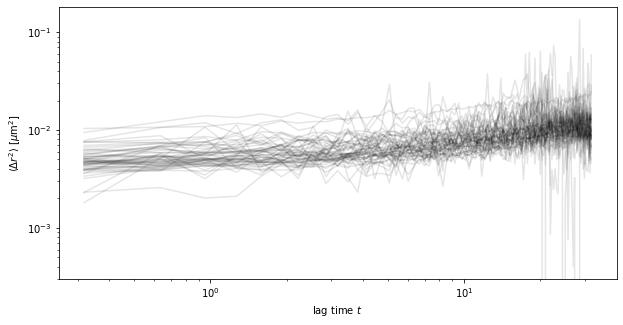

In [46]:
fig, ax = plt.subplots()
ax.plot(im.index, im, 'k-', alpha=0.1)  # black lines, semitransparent
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
       xlabel='lag time $t$')
ax.set_xscale('log')
ax.set_yscale('log')

# Ensemble Mean Squared Displacement
Now use the emsd function to compute the ensemble mean squared displacement (EMSD) of all particles:

In [47]:
em = tp.emsd(tm, 0.14, 3.15)  # microns per pixel = 0.07, frames per second = 15.54

[Text(0, 0.5, '$\\langle \\Delta r^2 \\rangle$ [$\\mu$m$^2$]'),
 Text(0.5, 0, 'lag time $t$')]

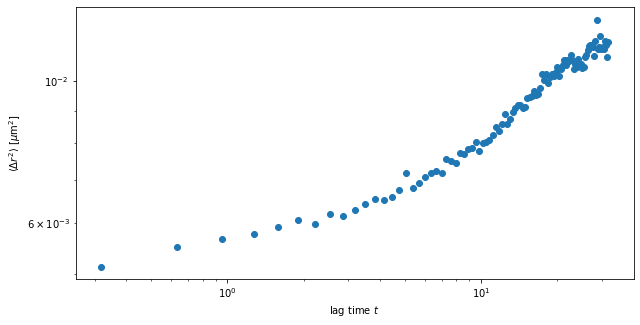

In [48]:
fig, ax = plt.subplots()
ax.plot(em.index, em, 'o')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
       xlabel='lag time $t$')
#ax.set(ylim=(1e-2, 10));

We can easily fit this ensemble mean-squared displacement to a power law, $At^n$, using a convenience function, fit_powerlaw, which performs a linear regression in log space.

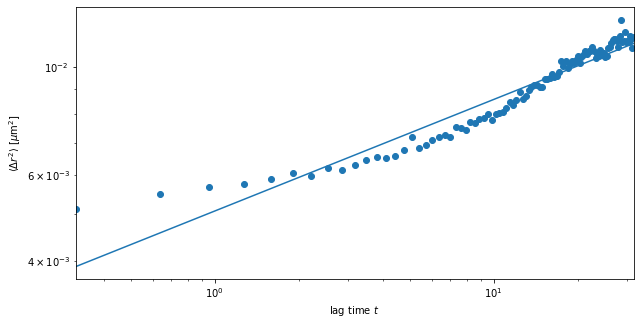

,n,A
msd,0.22808,0.005072


In [49]:
plt.figure()
plt.ylabel(r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]')
plt.xlabel('lag time $t$');
tp.utils.fit_powerlaw(em)  # performs linear best fit in log space, plots]

$A \approx 1.66$ $\mu\textrm{m}^2 / \textrm{s}$

$A = 4D$

In [51]:
em.to_csv('im2.csv')